<a href="https://colab.research.google.com/github/Ghifari-GM/my-repo-from-remote/blob/master/fix_wavelet_compact_v6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install yfinance

     |████████████████████████████████| 6.3 MB 43.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=aaf46d3923701b39cf98e2e4a3005f246a4eea6401bca7d25f4e184cde639ef0
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# We begin by importing the relevant libraries. Please make sure that PyCWT is
# properly installed in your system.
from __future__ import division
import numpy
from matplotlib import pyplot
import pandas as pd
import yfinance as yf
import pandas_datareader as web
import math
import scipy.special as sc
import numpy.matlib
from numpy import inf
from scipy.stats import chi2
from datetime import datetime  
from datetime import timedelta  
from scipy.signal import find_peaks
import scipy.signal as signal
from datetime import date
from google.colab import drive
from scipy.signal import savgol_filter

In [ ]:
class stock_predict:
  def __init__(self):
    self.life = 'Welcom to predict stock from ragdalion'
    # self.tickers= tick
    print(self.life)

  def get_yahoo_stock_historical_price(self,ticker= None,max=None, starts = '1900-10-10', ends = None):
    #get the stock quote
    self.tickers=ticker
    df = yf.Ticker(ticker)
    if max == True:
      data = df.history(period='max')
    else:
      data = df.history(start=starts,end=ends)
    return data

  def interpolation(self,data):
    temp_date_index = pd.date_range(data.index.min(), data.index.max())
    temp_close_reange = data.reindex(temp_date_index, fill_value=numpy.nan)
    r_interpolation=temp_close_reange[['Close']].interpolate(method="linear")
    # r_interpolation = r_interpolation["Close"]
    return r_interpolation,temp_close_reange,temp_date_index
  
  def interpolation_recon(self,data):
    temp_date_index = pd.date_range(data.index.min(), data.index.max())
    temp_close_reange = data.reindex(temp_date_index, fill_value=numpy.nan)
    r_interpolation=temp_close_reange[['Close_recon']].interpolate(method="linear")
    # r_interpolation = r_interpolation["Close"]
    return r_interpolation,temp_close_reange,temp_date_index

  def calculate_ema(self,prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema
  
  def relative_price_oscilator(self,data,n_ema_1=1,n_ema_50=50):
    rpo=[]
    ema_1 = stock_predict.calculate_ema(self,data, n_ema_1)
    ema_50 = stock_predict.calculate_ema(self,data, n_ema_50) 
    selisih=len(ema_1)-len(ema_50)
     
    for i in range(len(ema_1)):
      if i < (selisih):
        ema_temp = stock_predict.calculate_ema(self,data, i+1)
        selisih_temp=len(ema_1)-len(ema_temp)
        rpo_tunggal = ((ema_1[i]-ema_temp[i-selisih_temp])/ema_temp[i-selisih_temp])*100
        # # rpo_tunggal = ((ema_1[i])/ema_50[i+1])*100
        rpo.append(rpo_tunggal)
      else:
        rpo_tunggal = ((ema_1[i]-ema_50[i-selisih])/ema_50[i-selisih])*100
        rpo.append(rpo_tunggal)
    return rpo

  def nextpow2(self,N):
    """ Function for finding the next power of 2 """
    n = 1
    while n < N: n *= 2
    n=math.log2(n)
    return n

  def gammatil(self,x):
    y = math.exp(sc.gammaln(x))/(2**x);
    return y

  def ChiSquareCDF(self,x,n):
    if n < 0:
      raise Exception("n must be a non-negative integer")
    
    p = (sc.gammaincc(x/2, n/2));
    return p
  
  def MatrixMax(self,mat,nb = 2,factor = 0):
    # %Locates local maxima of a matrix.
    # %
    # %   local_max = MatrixMax(mat,nb,factor)
    # %   Calculates the location of the "local" maxima of the matrix mat. 
    # %   In each column, every  element is compared with its neighbors up to
    # %   "distance"  nb. Just the values which are larger than factor*(global_max), 
    # %   where global_max denotes the "global" maximum of mat, are selected.
    # %
    # %   INPUTS: 
    # %       mat - a matrix (whose locattion of local maxima we want to compute).
    # %   Optional inputs:
    # %       nb  - 2*nb+1 is the number of points used to compute a maximum
    # %            (Default: nb = 2).
    # %       factor - factor of the global maximum used to select a maximum
    # %             (Default: factor = 0).
    # %
    # %    OUTPUT: 
    # %       local_max - a 0-1 matrix, with the same size of mat, giving the 
    # %       location of the maxima (1 if the respective element is a maximum,
    # %       0 otherwise).
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    # %       THIS IS A  SLIGHT  MODIFICATION OF THE FUNCTION
    # %
    # %                       WAVELETRIDGE
    # %
    # %                             by
    # % Bernard CAZELLES                     Mario CHAVEZ
    # % Ecology-Evolution-Mathematics            LENA
    # % CNRS - UMR 7625 - 2005                   CNRS - LPR 640 - 2005
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    # %  Written by L. Aguiar-Conraria and M.J. Soares
    # %)
    # %   Lu�s AGUIAR-CONRARIA              Maria Joana SOARES                      
    # %   Dep. Economics                    Dep. Mathematics and Applications   
    # %   University of Minho               University of Minho
    # %   4710-057 Braga                    4710-057 Braga
    # %   PORTUGAL                          PORTUGAL
    # %                           
    # %   lfaguiar@eeg.uminho.pt            jsoares@math.uminho.pt 
    n_rows = len(mat)
    n_cols = mat.size/len(mat)
    local_max = numpy.zeros(n_rows,n_cols)
    global_max = factor*mat.max(); # % Global maximum of the matrix
    
    # for jj in range(int(n_cols)):
    #   for ii in range(nb,n_rows-nb):
    #     if mat(ii-nb:ii+nb,jj).max()
    return local_max
  
  def GMWMeasures(self,beta,gamma):
    # %Computes measures associated with a Generalized Morse Wavelet
    # %
    # %   [peak_freq,energy_freq,inst_freq,K_peak,K_energy,...
    # %     FF_peak,FF_energy,FF_inst,sigma_t,sigma_f,area_Heisen,duration]=...
    # %         GMWMeasures(beta,gamma)
    # %	Computes several quantities associated with a Generalized Morse Wavelet
    # %	with parameters beta and gamma.
    # %	These quantities are: 
    # %   . peak frequency, energy frequency and central instantaneous frequency; 
    # %   . normalizing constant for amplitude at peak frequncy equal to 2 and 
    # %     normalizing constant for unit energy;
    # %	. Fourier factors (to convert scales to Fourier periods) defined in 
    # %     terms of peak frequency, energy frequency or instantaneous frequency;
    # %	. standard deviation in time and standard deviation in frequency;
    # %	. Heisenberg area;
    # %   . non-dimensional duration; see [1]-[4] for details.
    # %   
    # %   INPUTS: 
    # %       beta - beta parameter of the GMW.
    # %       gamma - gamma parameter of of the GMW.
    # %
    # %   OUTPUTS:
    # %       peak_freq - peak frequecy.
    # %       energy_freq - energy frequency.   
    # %       inst_freq - central instanataneous frequency. 
    # %       K_peak - normalizing constant for amplitude at peak frequncy equal 
    # %                to 2.
    # %       K_energy - normalizing constant for unit energy.
    # %       FF_peak - Fourier-factor using peak frequency. 
    # %       FF_energy - Fourier-factor using energy frequency.
    # %       FF_inst - Fourier-factor using central instantaneous frequency.
    # %       sigma_t - radius (standard deviation) in time.
    # %       sigma_f - radius (standard deviation) in the frequency domain.
    # %       area_Heisen - Heisenberg area.
    # %       duration - non-dimensional duration.
    # % 
    # %   Example:
    # %       beta=3;
    # %       gamma=3;
    # %       [w_P,w_E,w_I,K_P,K_E,ff_P,ff_E,ff_I,sigma_T,sigma_w,aH,P] = ...
    # %         GMWMeasures(beta,gamma)
    # %
    # %   See also: AWT

    # %   References:
    # %   [1] Aguiar-Conraria, L. and Soares, M.J. (2014)
    # %         "The continuous wavelet transform: moving beyond the 
    # %         uni- and bivariate analyis", Journal of Economic Surveys
    # %         28(2), 344-375 
    # %   [2] Lilly, J.M. and Olhede, S. C.(2009) 
    # %       "Higher-Order Properties of  Analytic Wavelets", 
    # %       IEEE Trans. Signal Process. 57 (1), 146-160.
    # %   [3] Lilly, J.M. and Olhede, S. C.(2010), "On the Analytic Wavelet 
    # %         Transform", IEEE Transactions on Information Theory, 56 (8), 
    # %         4135-4156.
    # %   [4] Olhede, S.C. and Walden, A.T. (2002), "Generalized Morse Wavelets",
    # %       IEEE Transactions on Signal Processing, 50(1), 2661-2670
    # %

    # % Copyright 2018, L. Aguiar-Conraria and M.J. Soares

    # %   This software may be used, copied, or redistributed as long as it is 
    # %   not sold and this copyright notice is reproduced on each copy made. 
    # %   This routine is provided as is without any expres or implied 
    # %   warranties whatsoever. 
    # %   Please acknowledge the use of this software in any publications:
    # %   Wavelet software was provided by 
    # %   L. Aguiar-Conraria and M.J. Soares and is available at URL: 
    # %   https://sites.google.com/site/aguiarconraria/joanasoares-wavelets
    # %   Please send a copy of such publications to either L. Aguiar-Conraria or
    # %   M. J. Soares

    # %   Luís AGUIAR-CONRARIA              Maria Joana SOARES                      
    # %   Dep. Economics                    Dep. Mathematics and Applications   
    # %   University of Minho               University of Minho
    # %   4710-057 Braga                    4710-057 Braga
    # %   PORTUGAL                          PORTUGAL                          
    # %   lfaguiar@eeg.uminho.pt            jsoares@math.uminho.pt 
    if (beta<=0 or gamma<=0) is True:
      raise Exception("beta and gamma must be positive")
    # %%%%%%%%%%%%%%%%%%%%%%%%%%    Outputs          %%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    # %%%%% Normalizing constant for amplitude at peak frequncy equal to 2 %%%%%
    K_peak = 2*(math.exp(1)*gamma/beta)**(beta/gamma) # % Formula (7) in [4] 
    # %%%%%%%%%%      Normalizing constant for unit energy         %%%%%%%%%%%%%%
    r = (2*beta+1)/gamma # % This line was missing in a first version!!
    K_energy = (2**((r+1)/2)*math.sqrt(math.pi*gamma))/math.sqrt(math.exp(sc.gammaln(r)))
    # %%%%%%%%%%%%           Energy frequency                       %%%%%%%%%%%%%
    energy_freq = math.exp( sc.gammaln((2*beta+2)/gamma)-sc.gammaln((2*beta+1)/gamma) )*2**(-1/gamma); 
    # %%%%%%%%%%%%           Peak frequency                       %%%%%%%%%%%%%%%
    peak_freq = (beta/gamma)**(1/gamma); #% See [4, p.147] 
    # %%%%%%%%%%%%        Instantaneous  frequency                 %%%%%%%%%%%%%%
    inst_freq = math.exp(sc.gammaln((beta+2)/gamma)-sc.gammaln((beta+1)/gamma));# % Formula (44) in [4]
    #%%%%%%%%%%%%       Fourier factor (see [1, p.12])            %%%%%%%%%%%%%%
    FF_energy = (2*math.pi)/energy_freq; #% For energy_freq 
    
    FF_peak = (2*math.pi)/peak_freq; # % For peak_freq 
    
    FF_inst = (2*math.pi)/inst_freq;  #% For inst_freq 
    #%%%%%%%%%%%%%%%%%%       Radius in time          %%%%%%%%%%%%%%%%%%%%%%%%%%
    sigma_t = math.sqrt((beta**2*stock_predict.gammatil(self,(2*beta-1)/gamma)+gamma**2*stock_predict.gammatil(self,(2*beta+2*gamma-1)/gamma)-2*beta*gamma*stock_predict.gammatil(self,(2*beta+gamma-1)/gamma))/stock_predict.gammatil(self,(2*beta+1)/gamma));
    
    #                           % Formula () in [1]
    # %%%%%%%%%%%%%%%%%%       Radius in frequency     %%%%%%%%%%%%%%%%%%%%%%%%%%
    sigma_f = math.sqrt(2**(-2/gamma)*(math.exp(sc.gammaln((2*beta+3)/gamma)-sc.gammaln((2*beta+1)/gamma))-(math.exp(sc.gammaln((2*beta+2)/gamma)-sc.gammaln((2*beta+1)/gamma)))**2));                      
    
    area_Heisen = sigma_t*sigma_f; #% Formula (13) in [1]
                      
    duration = math.sqrt(beta*gamma); # % Formula (37) in [4] and Appendix D in [4]
                              # % See comment in  [4, pg. 151]                     
                                
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    return peak_freq,energy_freq,inst_freq,K_peak,K_energy,FF_peak,FF_energy,FF_inst,sigma_t,sigma_f,area_Heisen,duration

  def WaveletTransform(self,x,lx,dt,pad,extra_length,mother,beta,gamma,K,scales):
    x = numpy.array(x)
    s_x = x.shape
    if len(s_x)==1:
      print('sudah sesuai hanya tambahkan [] agar jadi row vector')
      x = numpy.array([x])
    elif len(s_x)==2:
      if s_x[0]==1:
        print('sudah sesuai')
        x = numpy.array(x)
      else:
        if s_x[1]>1:
          raise Exception("array tidak sesuai")
        else:
          print('perlu ditranspose')
          x = x.transpose()
    else:
      raise Exception("array tidak sesuai")
    x=x[0]
    # print('x single',x)
    x = (x-numpy.mean(x))/numpy.std(x,ddof=1);
    half_extra_length=math.floor(extra_length/2);
    if pad == 0: #% Zero-padding
      if (extra_length%2)==0:
        x_extended = numpy.concatenate((numpy.zeros(half_extra_length),x,numpy.zeros(half_extra_length)),axis=None);
      else:
        x_extended = numpy.concatenate((numpy.zeros(half_extra_length),x,numpy.zeros(half_extra_length+1)),axis=None);

    elif pad==1: # % Reflexive
      if (extra_length%2)==0:
        x_extended = numpy.concatenate((numpy.zeros(half_extra_length),numpy.fliplr([x]),x,numpy.fliplr([x]),numpy.zeros(half_extra_length)),axis=None);
        
      else:
        x_extended = numpy.concatenate((numpy.zeros(half_extra_length),numpy.fliplr([x]),x,numpy.fliplr([x]),numpy.zeros(half_extra_length+1)),axis=None);
       
    else: # % Constant padding
      xinitial = x[0];
      
      xfinal = x[-1];   
       
      if (extra_length%2)==0:
        x_extended = numpy.concatenate((numpy.zeros(half_extra_length),numpy.matlib.repmat(xinitial,1,lx),x,numpy.matlib.repmat(xfinal,1,lx),numpy.zeros(half_extra_length)),axis=None);
        
      else:       
        x_extended = numpy.concatenate((numpy.zeros(half_extra_length),numpy.matlib.repmat(xinitial,1,lx),x,numpy.matlib.repmat(xfinal,1,lx),numpy.zeros(half_extra_length+1)),axis=None);
      

    #%*-------------------End of padding  --------------------------------------

    N = len(x_extended); # % New data length after extending series

    #% Compute angular frequencies (see [1,p. 372])
    wk = numpy.arange(1,numpy.fix(N/2)+1)
    wk = wk*((2*math.pi)/(N*dt));
    array = numpy.arange(int(numpy.fix((N-1)/2)-1),-1,-1)
    wk = numpy.concatenate((numpy.zeros(1),wk,-wk[array]),axis=None) 
    # wk = numpy.round(wk,4)
    
    #% Compute Fast Fourier Transform of x_extended 
    ftx = numpy.fft.fft(x_extended);
    # % Compute Wavelet Transform
    n_scales = len(scales);  # % Number of scales
    WT = numpy.zeros([n_scales, N]);   #% Matrix to accomodate the Wavelet Transform
    WT = WT + 1j*WT;          # % Make it complex

    for iScales in range(0,n_scales): #% Do the computation for each scale % (at all times simultaneously)
      scaleP = scales[iScales];
      norm = K*math.sqrt(scaleP/dt);
      # norm = numpy.round(norm,4)
      if mother==0: #% This is for Morlet
          greater = numpy.greater(wk,0)*1
          hasil_pangkat = numpy.multiply(2,greater)
          exponent = -numpy.power((scaleP*wk-beta),2)/hasil_pangkat;
          exponent[exponent == -inf] = 0;
          daughter = norm*numpy.sqrt(2*math.pi)*numpy.exp(exponent);
          daughter = numpy.multiply(daughter,greater); 
          WT[iScales] = numpy.fft.ifft(numpy.multiply(ftx,daughter)); #% see [1, pp. 372-373]
      else: #  % This is for GMW
          greater = numpy.greater(wk,0)*1;
          exponent = -numpy.power((scaleP*wk),gamma);
          exponent = numpy.multiply(exponent,greater);
          daughter = norm*numpy.power((scaleP*wk),beta);
          daughter = numpy.multiply(daughter,numpy.exp(exponent));
          daughter = numpy.multiply(daughter,greater);
          WT[iScales] = numpy.fft.ifft(numpy.multiply(ftx,daughter)); # % [1, pp. 372-373] 
    if  pad==0:
      WT = WT[:,half_extra_length:half_extra_length+lx];
    else:
      WT = WT[:,half_extra_length+lx:half_extra_length+2*lx];

    return WT
  
  def AWT(self,x,dt=1,dj=1/4,low_period=0,up_period=0,pad=0,mother=0,beta=0,gamma=3.0,sig_type=0,n_sur=0,p=0,q=0):
    # %AWT Analytic Wavelet Transform of a series 
    # %    Computes the (matrix of the analytic) Wavelet Transform (WT) of a given 
    # %    series (vector) x, using a Morlet or a Generalized Morse Wavelet. 
    # %    Decomposition is done between two periods (low_period,up_period). 
    # %    It also computes the (matrix of normalized) Wavelet Power Spectrum (WPS) 
    # %    and its p-values (pv_WPS); these p-values can be computed in three ways:
    # %     -- with the theoretical distribution, with AR(0) as null 
    # %                          or
    # %     -- with the theoretical distribution, with AR(1) as null 
    # %                          or
    # %     -- with Monte Carlo simulations; 
    # %        in this case, n_sur surrogates are  obtained by fitting an ARMA(p,q) model to the series
    # %        and constructing new samples by drawing errors from a Gaussian distribution.
    # %        These surrogates are constructed with the use of the function SurrogateSeries
    # %        contained in  the folder Auxiliary.
    # %    Has a subfunction: WaveletTransform
    # % 
    # % NOTE: The computation of pv_WPS using the theoretical distributions
    # %       is much faster than using Monte-Carlo simulations. 
    # %       However, it SHOULD ONLY BE USED WITH MORLET WAVELETS.

    # %    INPUTS:
    # %        x - vector (time-series).
    # % 
    # %    Optional inputs: 
    # %        dt - sampling rate 
    # %             0  or []-> Default: dt = 1
    # %        dj - frequency resolution (1/dj = number of voices per octave)
    # %             0  or [] -> Default: dj = 1/4
    # %        low_period - lower period of the decomposition 
    # %             0 or [] -> Default: low_period = 2*dt
    # %        up_period - upper period of the decomposition 
    # %              0 or []-> Default: up_period = length(x)*dt      
    # %        pad - the type of pad to the series (boundary conditions):
    # %              0 or 'zero' or [] -> zero-pading (default)
    # %              1 or 'reflexive' -> reflection at the boundaries
    # %              2 or 'constant' -> constant (repeat first and last values)
    # %       mother - the type of mother wavelet function: 
    # %               0 or 'Morlet' -> Morlet wavelet (default)
    # %               1 or  'GMW'   -> Generalized Morse Wavelet    
    # %       beta - the beta parameter for the GMW or the Morlet (omega_0) parameter:
    # %             0  or []-> Default: 6.0 for 'Morlet'; 3.0 for 'GMW'                                                      
    # %       gamma - the gamma parameter of the GMW 
    # %             0 or [] ->  Default: 3.0 
    # %       sig_type - how to compute levels of significance for wavelet power spectrum
    # %             0 or [] or 'NONE'-> no computation (default)
    # %             1 or 'AR0' -> theoretical distribution, AR(0) as null
    # %             2 or 'AR1' -> theoretical distribution, AR(1) as null
    # %             3 or 'MCS'->  Monte Carlo simulation
    # %       n_sur - number of surrogates for MC simulation
    # %              0 or [] -> Default: 0 (no simulation);
    # %       p,q -  non-negative integers, orders of the ARMA(p,q) model 
    # %               0 or [] ->  Default: p=0, q=0
    # %  OUTPUTS:
    # %       WT - (Complex) Wavelet Transform Matrix (num. rows = num. scales used; 
    # %                                                num. columns = length(x))
    # %       periods - the vector of Fourier periods (in time units) that
    # %                 correspond to the used scales
    # %  Optional outputs:
    # %       coi - the "cone-of-influence", which is a vector of the same 
    # %           size as x that contains the limit of the region where 
    # %           the wavelet transform is influenced by edge effects
    # %       WPS -  (Normalized) Wavelet Power Spectrum
    # %       pv_WPS - p-values for Wavelet Power Spectrum
    try:
      if len(x) == 0:
        raise Exception("time series x input is zero (error)")
    except:
      raise Exception("time series x must be numeric array/matrix and not empty array")
    lx = len(x);
    # % Default parameters 
    if dt==0: dt=1
    if dj==0: dj=1/4
    if low_period==0: low_period=2*dt
    if up_period==0: up_period=len(x)*dt
    if gamma==0: gamma=3.0
    # checking pad
    if type(pad)==str:
      if pad=='zero':
        pad = 0
      elif pad=='reflexive':
        pad =1
      elif pad=='constant':
        pad=2
      else:
        print('Unknown type of pad; we will use zero-padding 1',)
        pad = 0
    elif (pad == 0 or pad == 1 or pad == 2) is False:
      print('Unknown type of pad; we will use zero-padding 2',)
      pad=0
    #checking wavelet mother
    if type(mother)==str:
      if mother=='Morlet':
        mother=0
      elif mother=='GMW':
        mother=1
      else:
        print('Unknown mother wavelet; we will use a Morlet 1')
        mother=0
    elif (mother == 0 or mother == 1) is False:
      print('Unknown mother wavelet; we will use a Morlet 2')
      mother=0
    
    if type(sig_type)==str:
      if sig_type=='NONE':
        sig_type=0
      elif sig_type=='AR0':
        sig_type=1
      elif sig_type=='AR1':
        sig_type=2
      elif sig_type=='MCS':
        sig_type=3
      else:
        print('Unknown sig_type; we will not compute significance levels 1')
        sig_type=0
    elif (sig_type == 0 or sig_type == 1 or sig_type == 2 or sig_type == 3) is False:
      print('Unknown sig_type; we will not compute significance levels 2')
      sig_type=0
    # %------------------------------------------------------------------------ 
    # %               This part depends on the mother wavelet 
    # %------------------------------------------------------------------------
    if mother==0: #morlet
      if beta==0: beta= 6
      energy_f = beta #% Energy frequency (Formula (17) in [1])
      sigma_t = 1/math.sqrt(2) # % Time-spread sigma_t (see [1, p.352])
      K = math.pi**(-0.25) #    %  (see [1, p.9]) 
      Fourier_factor = (2*math.pi)/energy_f #% Fourier factor % (see [1, p.375])
    else:
      # % Use of function GMWMeasures (in folder Auxiliary)to obtain 
      # % K, Fourier_factor and sigma_t for
      # % Generalized Morse Wavelet
      if beta==0:
        beta=3
      _,_,_,_,K,_,Fourier_factor,_,sigma_t,_,_,_=stock_predict.GMWMeasures(self,beta,gamma); 
        #ada gmw measures
    #%----------  End of part dependent on mother wavelet -----------------------

    # % Determine extra length (depending on pad type) 
    pot2 = stock_predict.nextpow2(self,lx);
    total_length = 2**(pot2+2);
    if pad == 0:
      extra_length = total_length-lx;
    else:
      extra_length = total_length-3*lx;
    #print(extra_length)
    # % Compute vectors of scales and periods
    s0 = low_period/Fourier_factor; #% Convert low_period to minimum scale s0
    if up_period > lx*dt:
      print('up_period is too long; it will be adapted')
      up_period = lx*dt;
    
    up_scale = up_period/Fourier_factor; # % Convert up_period to maximum scale 
    J = numpy.fix(math.log2(up_scale/s0)/dj); #% Index of maximum scale
    scales = s0*2**((numpy.arange(0,(J+1),1))*dj);    # % Vector of scales (Formula (B2) in [1])             
    periods = Fourier_factor*scales; #% Conversion of scales to periods
    WT = stock_predict.WaveletTransform(self,x,lx,dt,pad,extra_length,mother,beta,gamma,K,scales);

    # 2 % Compute coi (if desired)
    coiS = Fourier_factor/sigma_t; # % see [1, p.375]
    coi = coiS*dt*numpy.concatenate((1E-5,numpy.arange(1,((lx+1)/2-1)),numpy.fliplr([numpy.arange(1,(lx/2-1)+1)]),1E-5),axis=None);

    #  3 % Compute power
    WPS = abs(numpy.power(WT,2)); # % Formula (6) in [1] 
    
    

    # % Compute pv_WPS (theoretical distribution is for 
    #       %                            no normalized power)
    #       % ----- Compute p-values of Wavelet Power Spectrum  -------
    #       %        (only computed if sig_type > 0 and n_sur >0)                          
    #       % - if sig_type = 1 or sig_type = 2 (analytical distributions); 
    #       %   uses function ChiSquareCDF (in folder Auxiliary)
    #       % - if sig > 2, uses function SurrogateSeries (in folder Auxiliary)
    if sig_type == 0:
      pv_WPS=[]; 

    elif sig_type == 1: #% Analytical distribution with AR(0) as null;  
                                # % see [4], formula (18) with Pk=1 
                                # % (formula (16) in [4], alpha=0)
      teor = 2*WPS; 
      pv_WPS = 1-stock_predict.ChiSquareCDF(self,teor,2);
      print('CDF Masuk')
    elif sig_type == 2:# % Analytical distribution with AR(1) as null; 
      pass
                  # n_cols = int(WPS.size/len(WPS));
                  # alpha = AROLS(x,1); # % lag-1 coefficient in AR(1) model
                  # freqs = dt./periods;
                  # Pk = (1-alpha^2)./(1-2*alpha*cos(freqs*2*pi)+alpha^2); 
                  #                             % formula (16) in [4]
                  # PkM = repmat(Pk',1,n_cols); % Expand Pk into a matrix 
                  # teor = 2*WPS./PkM;
                  # pv_WPS = 1-ChiSquareCDF(teor,2);  

    # % Normalize power
    # nC = len(WPS);
    nC =int(WPS.size/len(WPS)) 
    scales_t = numpy.array([scales])
    remap = numpy.matlib.repmat(scales_t.transpose(),1,nC)
    WPS = numpy.divide(WPS,remap)
    return WT,periods,coi,WPS,pv_WPS

  def making_sub_interval(self,data,sub_sum=1.0,limit = False, num_lim = 12 ):
    hasil_sub = []
    start = 0
    jumlah_round = len(data)//sub_sum
    stop = sub_sum
    if limit == False:
      for x in range(jumlah_round):
        temp_1 = data[start:stop]
        # print('start= ', start)
        # print('stop= ', stop)
        start = stop
        stop = stop+sub_sum
        hasil_sub.append(temp_1)
    else:
      for x in range(jumlah_round):
        if x < num_lim:
          temp_1 = data[start:stop]
          # print('start= ', start)
          # print('stop= ', stop)
          start = stop
          stop = stop+sub_sum
          hasil_sub.append(temp_1)
        else:
          break
    return hasil_sub
  
  def average_interval_jurnal(self,data_subinter):
    k =  math. ceil((len(data_subinter)*len(data_subinter[0]))/len(data_subinter[0]))
    # print('k',k)
    average_average = []
    temp = numpy.zeros(len(data_subinter[0]))
    for x in range(len(data_subinter)):
      temp = temp + data_subinter[x]
    
    average_average=temp/k

    return average_average
  
  def fourierSeries(self,period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = numpy.arange(T)
    for n in range(N+1):
        an = 2/T*(period * numpy.cos(2*numpy.pi*n*t/T)).sum()
        bn = 2/T*(period * numpy.sin(2*numpy.pi*n*t/T)).sum()
        result.append((an, bn))
    return numpy.array(result)
  
  def reconstruct(self,P, anbn):
    result = 0
    t = numpy.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*numpy.cos(2*numpy.pi*n*t/P) + b*numpy.sin(2*numpy.pi*n*t/P)
    return result
  
  def recon_signal (self,datain, sel_period,n_overtones=6,last_cycle=6):
    sinus_signal=[]
    sinus_cont=[]
    sinus_future=[]
    longest_len=0


    #merekontruksi sinyal sinus dari data rpo dan period yang diketahui dengan menggunakan fourier series
    for i in range (len(sel_period)):
      signal_sub = stock_predict.making_sub_interval(self,datain,sel_period[i],limit=True,num_lim=last_cycle)
      signal_avg = stock_predict.average_interval_jurnal(self,signal_sub)
      signal_four = stock_predict.fourierSeries(self,signal_avg,n_overtones)
      sinus_signal.append(stock_predict.reconstruct(self,len(signal_avg), signal_four[:n_overtones,:]))

    #mencari data/sinus terpanjang 
    for i in range (len(sel_period)):
      if len(sinus_signal[i]) > longest_len:
        longest_len = len(sinus_signal[i])


    longest_lenx6 = longest_len*6  #memanjangkan sinyal sinus hingga 6x dan menyamakan semua panjang sinyal agar bisa di-superposisi-kan
    for i in range (len(sel_period)):
      if longest_len > 0:                #untuk menghindari pembagian nilai 0 
        factor = longest_len/len(sinus_signal[i])
        if 0 < factor <= 1:
          temp_value = numpy.matlib.repmat(sinus_signal[i],1,int(numpy.round(factor*6)))  #sinyal sinus terpanjang dikalikan 6 dan dijadikan panjang maksimal
        else:
          temp_value = numpy.matlib.repmat(sinus_signal[i],1,int(numpy.round(factor*7)))  #sinyal sinus yang lebih pendek dikalikan 8 agar panjangnya melebihi nilai maksimal
        sinus_cont.append(temp_value[0][0:longest_lenx6])   #sinyal sinus yang lebih panjang dari panjang maksimal setelah dikalikan 6 akan dibuang
    

    for i in range (len(sel_period)):
      if longest_len > 0:                #untuk menghindari pembagian nilai 0 
        factor = longest_len/len(sinus_signal[i])
        sin_inv=(sinus_signal[i][::-1])
        if 0 < factor <= 1:
          temp_value = numpy.matlib.repmat(sin_inv,1,int(numpy.round(factor*6)))  #sinyal sinus terpanjang dikalikan 6 dan dijadikan panjang maksimal
        else:
          temp_value = numpy.matlib.repmat(sin_inv,1,int(numpy.round(factor*7)))  #sinyal sinus yang lebih pendek dikalikan 8 agar panjangnya melebihi nilai maksimal
        sinus_future.append(temp_value[0][0:longest_lenx6])   #sinyal sinus yang lebih panjang dari panjang maksimal setelah dikalikan 6 akan dibuang

    superposition = numpy.sum(sinus_cont, axis=0)   #penjumlahan sinyal yang ada di array/superposisi
    superposition = superposition[::-1]

    superposition_future = numpy.sum(sinus_future, axis=0)


    superposition = numpy.sum(sinus_cont, axis=0)   #penjumlahan sinyal yang ada di array/superposisi
    superposition = superposition[::-1]

    superposition_future = numpy.sum(sinus_future, axis=0)
    
    predict_signal=numpy.concatenate([superposition, superposition_future])
    # figure, axis = pyplot.subplots(3, 1,figsize=(30,15))
    # axis[0].plot(superposition)
    # axis[1].plot(superposition_future)
    # axis[2].plot(predict_signal)
    # axis[2].vlines(x=len(superposition), ymin=numpy.min(predict_signal), ymax = numpy.max(predict_signal), color = "red")

    return superposition, superposition_future
  
  def fit_signal_reconstruct_data(self,data_in_rpo,data_in_close,data_target,predict = False):
    n_pad = len(data_target)-len(data_in_rpo)
    #RPO_scale 
    if n_pad>=0:
      data_with_pad=numpy.pad(data_in_rpo, (n_pad, 0), 'constant', constant_values=(numpy.nan, 0))
      if predict == False:    
        signal_pad_pd = pd.DataFrame(data_with_pad)
        data_target['recon_rpo'] = signal_pad_pd.values
      else:
        temp_date_index = pd.date_range(data_target.index.min(), data_target.index.max()+ timedelta(days=len(data_in_rpo)))
        data_target = data_target.reindex(temp_date_index, fill_value=numpy.nan)
        data_with_pad_tambah = numpy.concatenate((data_with_pad,data_in_rpo),axis=None) 
        data_with_pad_tambah = pd.DataFrame(data_with_pad_tambah)
        data_target['recon_rpo'] = data_with_pad_tambah.values
    else:
      if predict == False:
        data_in_cut = data_in_rpo[abs(n_pad):]
        signal_pad_pd = pd.DataFrame(data_in_cut)
        data_target['recon_rpo'] = signal_pad_pd.values
      else:
        data_in_cut = data_in_rpo[abs(n_pad):]
        temp_date_index = pd.date_range(data_target.index.min(), data_target.index.max()+ timedelta(days=len(data_in_rpo)))
        data_target = data_target.reindex(temp_date_index, fill_value=numpy.nan)
        data_in_cut_tambah = numpy.concatenate((data_in_cut,data_in_rpo),axis=None)
        data_in_cut_tambah = pd.DataFrame(data_in_cut_tambah)
        data_target['recon_rpo'] = data_in_cut_tambah.values
    #close_price_scale   
    if n_pad>=0:
      data_with_pad=numpy.pad(data_in_close, (n_pad, 0), 'constant', constant_values=(numpy.nan, 0))
      if predict == False:    
        signal_pad_pd = pd.DataFrame(data_with_pad)
        data_target['recon_close'] = signal_pad_pd.values
      else:
        # temp_date_index = pd.date_range(data_target.index.min(), data_target.index.max()+ timedelta(days=len(data_in_close)))
        # data_target = data_target.reindex(temp_date_index, fill_value=numpy.nan)
        data_with_pad_tambah = numpy.concatenate((data_with_pad,data_in_close),axis=None) 
        data_with_pad_tambah = pd.DataFrame(data_with_pad_tambah)
        data_target['recon_close'] = data_with_pad_tambah.values
    else:
      if predict == False:
        data_in_cut = data_in_close[abs(n_pad):]
        signal_pad_pd = pd.DataFrame(data_in_cut)
        data_target['recon_close'] = signal_pad_pd.values
      else:
        data_in_cut = data_in_close[abs(n_pad):]
        # temp_date_index = pd.date_range(data_target.index.min(), data_target.index.max()+ timedelta(days=len(data_in_close)))
        # data_target = data_target.reindex(temp_date_index, fill_value=numpy.nan)
        data_in_cut_tambah = numpy.concatenate((data_in_cut,data_in_close),axis=None)
        data_in_cut_tambah = pd.DataFrame(data_in_cut_tambah)
        data_target['recon_close'] = data_in_cut_tambah.values
    return data_target

  def fit_signal_reconstruct_data_universal(self,data_in_rpo,data_in_future, data_target,predict = False):
    n_pad = len(data_target)-len(data_in_rpo)
    #RPO_scale 
    if n_pad>=0:
      data_with_pad=numpy.pad(data_in_rpo, (n_pad, 0), 'constant', constant_values=(numpy.nan, 0))
      if predict == False:    
        signal_pad_pd = pd.DataFrame(data_with_pad)
        data_target['predict_non_scale'] = signal_pad_pd.values
      else:
        temp_date_index = pd.date_range(data_target.index.min(), data_target.index.max()+ timedelta(days=len(data_in_future)))
        data_target = data_target.reindex(temp_date_index, fill_value=numpy.nan)
        data_with_pad_tambah = numpy.concatenate((data_with_pad,data_in_future),axis=None) 
        data_with_pad_tambah = pd.DataFrame(data_with_pad_tambah)
        data_target['predict_non_scale'] = data_with_pad_tambah.values
    else:
      if predict == False:
        data_in_cut = data_in_rpo[abs(n_pad):]
        signal_pad_pd = pd.DataFrame(data_in_cut)
        data_target['predict_non_scale'] = signal_pad_pd.values
      else:
        data_in_cut = data_in_rpo[abs(n_pad):]
        temp_date_index = pd.date_range(data_target.index.min(), data_target.index.max()+ timedelta(days=len(data_in_future)))
        data_target = data_target.reindex(temp_date_index, fill_value=numpy.nan)
        data_in_cut_tambah = numpy.concatenate((data_in_cut,data_in_future),axis=None)
        data_in_cut_tambah = pd.DataFrame(data_in_cut_tambah)
        data_target['predict_non_scale'] = data_in_cut_tambah.values
    return data_target
  
  def scaling(self,array_input, array_target_scaliing, yoffset=0):
    max_min_input = numpy.max(array_input)-numpy.min(array_input)
    max_min_input_target = numpy.max(array_target_scaliing)-numpy.min(array_target_scaliing)
    scale = max_min_input_target/max_min_input
    hasil_scaling = array_input*scale
    mean = numpy.mean(array_target_scaliing)
    max_min_input_scaling = numpy.max(hasil_scaling)-numpy.min(hasil_scaling)
    kurang = numpy.max(hasil_scaling)-(max_min_input_scaling/2)
    hasil_scaling = numpy.subtract(hasil_scaling,(kurang))
    hasil_scaling = numpy.add(hasil_scaling,mean)
    res_offset= numpy.multiply((kurang/5),yoffset)
    hasil_scaling = numpy.add(hasil_scaling,res_offset)
    return hasil_scaling, scale
  
  def scaling_rpo(self,array_input, array_target_scaliing):
    max_min_input = numpy.max(array_input)-numpy.min(array_input)
    max_min_input_target = numpy.max(array_target_scaliing)-numpy.min(array_target_scaliing)
    scale = max_min_input_target/max_min_input
    hasil_scaling = array_input*scale
    max_min_input_scaling = numpy.max(hasil_scaling)-numpy.min(hasil_scaling)
    kurang = numpy.max(hasil_scaling)-(max_min_input_scaling/2)
    hasil_scaling = hasil_scaling - kurang
    return hasil_scaling
  
  def scaling_close(self,array_input, array_target_scaliing):
    max_min_input = numpy.max(array_input)-numpy.min(array_input)
    max_min_input_target = numpy.max(array_target_scaliing)-numpy.min(array_target_scaliing)
    scale = max_min_input_target/max_min_input
    hasil_scaling = array_input*scale
    # max_min_input_scaling = min(hasil_scaling)
    kurang = numpy.min(hasil_scaling)
    hasil_scaling = hasil_scaling - kurang
    return hasil_scaling
  
  def sort_period(self,peaks,periods,GWPS,n):
    Data_peaks_df = pd.DataFrame(numpy.arange(len(peaks)))
    Data_peaks_df['peaks'] = pd.DataFrame(peaks)
    float_array = numpy.round(periods[peaks])
    int_array = float_array.astype(int)
    Data_peaks_df['period'] = pd.DataFrame(int_array)
    Data_peaks_df['GWPS'] = pd.DataFrame(GWPS[peaks])
    Data_peaks_df_ascending=Data_peaks_df.sort_values(by='GWPS', ascending=False)
    five_high_peaks_period = Data_peaks_df_ascending['period']
    five_high_peaks_period = five_high_peaks_period[0:n]
    five_high_peaks = Data_peaks_df_ascending['peaks']
    five_high_peaks = five_high_peaks[0:n]
    data = []
    data2 = []
    for x in five_high_peaks_period:
      data.append(x)
    for y in five_high_peaks:
      data2.append(y)
    return data,data2
  
  def mean_cycles_gwps(self,power,periods,cycle=12, max_cycle = False):
    GWPS_cycles = []
    for z in range(len(power)):
      x_row =  power[z]
      
      period = numpy.int(periods[0])
      # print('period ')
      # print(period)
      if max_cycle == False:
        start = len(x_row)-(cycle*period)
        # print('start')
        # print(start)
      else:
        start = 0
      stop = len(x_row)
      GWPS_cycle = numpy.mean(x_row[start:stop]);
      GWPS_cycles.append(GWPS_cycle)
    GWPS=numpy.array(GWPS_cycles)
    GWPS_cycles_transpose = numpy.array([GWPS_cycles])
    GWPS_cycles_transpose = GWPS_cycles_transpose.transpose()
    return GWPS, GWPS_cycles_transpose

  #check correlation between rpo with signal
  def correlation(self,data_input,n_base_rpo=0,n_base_superposition=0):
    rpo=data_input['rpo']
    signal_super=data_input['predict_non_scale']
    start = n_base_rpo-n_base_superposition
    if start >= 0:
      start = start
    else:
      start=0
    stop = n_base_rpo         
    hasil_correlation = numpy.corrcoef(rpo[start:stop], signal_super[start:stop])[0, 1]
    # print(rpo[start:stop])
    # print(signal_super[start:stop])
    # print(hasil_correlation)
    # pyplot.figure(figsize=(30,8))
    # pyplot.plot(rpo[start:stop])
    # pyplot.plot(signal_super[start:stop])
    return hasil_correlation


  def finding_overtones(self,rpo_stock_inter,stock_interpolation,array_period,n_start_over=2,n_over=30,last_cycle=6):
    # Data_corelasi = pd.DataFrame(numpy.arange(2,(n_over+1)))
    # Data_corelasi['N'] = pd.DataFrame(numpy.arange(2,(n_over+1)))
    nilai_corelasi = []


    best_hasil_korelasi = -1
    for n in range(n_start_over,(n_over+1)):
      stock_interpolation_inverse = rpo_stock_inter[::-1]
      datain_rpo = stock_interpolation_inverse   #rpo dari grafik emiten
      superpositions, superposition_future=stock_predict.recon_signal(self,datain_rpo, array_period,n,last_cycle)   
      stock_interpolation_final = stock_predict.fit_signal_reconstruct_data_universal(self,superpositions,superposition_future,stock_interpolation,predict=True)
      hasil_corelasi =stock_predict.correlation(self,stock_interpolation_final,n_base_rpo=len(rpo_stock_inter),n_base_superposition=max(array_period))
      nilai_corelasi.append(numpy.round(hasil_corelasi,decimals=4))
      if best_hasil_korelasi < hasil_corelasi:
        best_hasil_korelasi=hasil_corelasi
        best_superpositions=superpositions
        best_superpositions_future = superposition_future
        best_stock_interpolation_final=stock_interpolation_final
    
    Data_corelasi = {'N':numpy.arange(n_start_over,(n_over+1)),'korelasi':nilai_corelasi}
    Data_corelasi = pd.DataFrame(Data_corelasi)

    nilai_corelasi = pd.DataFrame(nilai_corelasi)
    Data_corelasi['korelasi'] = nilai_corelasi.values
    Data_corelasi_ascending=Data_corelasi.sort_values(by='korelasi', ascending=False)
    one_high = numpy.max(Data_corelasi_ascending['korelasi'])
    highest_over_least_N = Data_corelasi_ascending.loc[Data_corelasi_ascending["korelasi"] >= one_high, "N"]
    highest_over_least_N = highest_over_least_N.sort_values( ascending=True,ignore_index=True)
    highest_over_least_N = highest_over_least_N[0]
    return Data_corelasi_ascending,highest_over_least_N,best_hasil_korelasi,best_superpositions,best_superpositions_future,best_stock_interpolation_final


  def finding_best_last_cycle(self,rpo_stock_inter,stock_interpolation,power,periods,L_awal=1,L_akhir=20,n_start_over=2,n_over=30, max_cycle = False):
    n_last = []
    n_overtones_maks = []
    corelation_best_value = []
    # data_frames = pd.DataFrame(numpy.arange(L_awal,(L_akhir+1)))
    best_maks_corelation=0
    for n_last_cycle in range(L_awal,L_akhir+1):
      # print('len power ', len(power))
      # print('power')
      # print(power)
      GWPS,GWPS_transpose = stock_predict.mean_cycles_gwps(self,power,periods,cycle=n_last_cycle, max_cycle = False)
      GWPS_avg = numpy.mean(GWPS)
      peaks, _ = find_peaks(GWPS, height = GWPS_avg,distance=30)
      array_period, data_peaks_df = stock_predict.sort_period(self,peaks,periods,GWPS,5)
      overtones_value,n_optimal,highest_corelation,highest_superpositions,highest_superpositions_future,highest_stock_interpolation_final = stock_predict.finding_overtones(
          self,rpo_stock_inter,stock_interpolation,array_period,n_start_over=n_start_over,n_over=n_over,last_cycle=n_last_cycle)
      n_last.append(n_last_cycle)
      n_overtones_maks.append(n_optimal)
      corelation_best_value.append(highest_corelation)
      if best_maks_corelation < highest_corelation:
        best_n_last = n_last_cycle
        best_maks_corelation = highest_corelation
        best_n_optimal=n_optimal
        best_superpositions = highest_superpositions
        best_superpositions_future = highest_superpositions_future
        best_stock_interpolation_final = highest_stock_interpolation_final
        best_GWPS =GWPS
        best_GWPS_transpose = GWPS_transpose
        best_GWPS_avg = GWPS_avg
        best_peaks = peaks
        best_array_period = array_period
        best_data_peaks_df = data_peaks_df

    data_frames = {'n_last':n_last,'n_overtones_maks':n_overtones_maks,'corelation_best_value':corelation_best_value}
    data_frames = pd.DataFrame(data_frames)
    # n_last = pd.DataFrame(n_last)
    # data_frames['n_last'] = n_last.values
    # n_overtones_maks = pd.DataFrame(n_overtones_maks)
    # data_frames['n_overtones_maks'] = n_overtones_maks.values
    # corelation_best_value = pd.DataFrame(corelation_best_value)
    # data_frames['corelation_best_value'] = corelation_best_value.values
    data_frames=data_frames.sort_values(by='corelation_best_value', ascending=False)
    return data_frames,best_n_last,best_n_optimal,best_maks_corelation,best_superpositions,best_superpositions_future,best_stock_interpolation_final,best_GWPS,best_GWPS_transpose,best_GWPS_avg,best_peaks,best_array_period,best_data_peaks_df
  
  def rating_index(self,stock_code,max_active,start_date,end_date):
    stock_index=[]
    n_last_best=[]
    n_optimal_best=[]
    maks_corelation_best=[]
    best_peaks = []
    data_frames = pd.DataFrame(numpy.arange(len(stock_code)))
    for stock_name in stock_code:
      stock = pd.DataFrame(stock_predict.get_yahoo_stock_historical_price(self,ticker=stock_name,max=max_active ,starts=start_date, ends=end_date)) #If max=True the data will be download maksimum up to  date until today
      # print(stock)
      stock_close_recon = stock[['Close']]
      stock['Close_recon'] = stock_close_recon.values
      stock.loc[stock['Volume'] == 0, 'Close_recon'] = numpy.nan

      stock_close_not_inter = stock[['Close']]
      stock_interpolation, stock_nan, stock_date = stock_predict.interpolation(self,stock_close_not_inter)
      stock_close_recon_not_inter = stock[['Close_recon']]
      stock_interpolation_r, stock_nan_r, stock_date_r = stock_predict.interpolation_recon(self,stock_close_recon_not_inter)
      stock_nan=pd.DataFrame(stock_nan)
      stock_interpolation['Close_recon'] = stock_interpolation_r.values
      stock_interpolation['Close_nan'] = stock_nan.values
      #making RPO oscilator
      rpo_stock_inter = stock_predict.relative_price_oscilator(self,stock_interpolation['Close_recon'],1,50) #chosing ema number default 1 and 50 #in list default
      rpo = pd.DataFrame(rpo_stock_inter)
      stock_interpolation['rpo'] = rpo.values

      #wavelet_transform
      #State variable for input AWT
      x = stock_interpolation['rpo'] # input rpo
      dt=1 #resolution for data
      t = dt*numpy.arange(1,len(x)+1); #making t index from 1 until the last data
      dj=1/300 #resolution frequency
      low_period=15 #low period for observation
      up_period=1460 #high period for obsevartion
      pad=0 #type of pad there is zero (0) reflective (1) constant (2)
      mother='Morlet' #type of mother there are 0 or 'Morlet' and 1 or  'GMW'
      beta=30 #index for mother 'Morlet' and 'GMW'
      gamma=0 #index for mother only 'GMW'
      sig_type='AR0' #signiticant type 1 or 'AR0', 2 or 'AR1' and 3 or 'MCS'
      WT,periods,coi,power,pv_power = stock_predict.AWT(self,x,dt,dj,low_period,up_period,pad,mother,beta,gamma,sig_type)#State variable for input AWT
      #finding_best_cycle_and_overtones
      _,best_n_last,best_n_optimal,best_maks_corelation,_,_,_,_,_,_,_,best_data_peaks_df =stock_predict.finding_best_last_cycle(self,rpo_stock_inter,stock_interpolation,power,periods,L_awal=5,L_akhir=30,n_over=30)
      # hasil_frame,best_n_last,best_n_optimal,best_maks_corelation,best_superpositions,best_stock_interpolation_final,best_GWPS,best_GWPS_transpose,best_GWPS_avg,best_peaks,best_array_period,best_data_peaks_df =finding_best_last_cycle(rpo_stock_inter,stock_interpolation,power,periods,L_awal=5,L_akhir=30,n_over=30)
      print('index '+ stock_name + ' Done' )
      stock_index.append(stock_name)
      n_last_best.append(best_n_last)
      n_optimal_best.append(best_n_optimal)
      maks_corelation_best.append(best_maks_corelation)
      best_peaks.append(best_data_peaks_df)
    print('making index')
    stock_index = pd.DataFrame(stock_index)
    data_frames['stock_index'] = stock_index.values
    n_last_best = pd.DataFrame(n_last_best)
    data_frames['n_last_best'] = n_last_best.values
    n_optimal_best = pd.DataFrame(n_optimal_best)
    data_frames['n_overtunes_best'] = n_optimal_best.values
    maks_corelation_best = pd.DataFrame(maks_corelation_best)
    data_frames['corelation_best_value'] = maks_corelation_best.values
    # best_peaks = pd.DataFrame(best_peaks)
    # data_frames['best_peaks'] = best_peaks.values
    print('done')
    return data_frames
  def sub_making_signal_buy_sell(self,datain_close,len_start_predict=0,number_cycle=2,scale_factor_peak_depth=30):
    start_peak_close=len_start_predict- numpy.int((len_start_predict/6)*number_cycle)
    stop=len(datain_close)

    invers_close=-datain_close
    days_tolerance = 0
    # print('stop = ', stop)
    # print('start = ', stop-(6*30))
    datain_close_limit = datain_close[(len_start_predict-(6*30)):len_start_predict]
    # print(datain_close_limit)
    # print('len datain_close_limit ', len(datain_close_limit))
    peak_depth = numpy.max(datain_close_limit)-numpy.min(datain_close_limit)
    # print('max close limti = ', numpy.max(datain_close_limit))
    # print('min close limti = ', numpy.min(datain_close_limit))
    # print('min_max depth = ',peak_depth )
    peak_depth = (peak_depth/scale_factor_peak_depth)#*scale_factor
    # print('faktor depth = ', peak_depth)


    array_sell_close, _ = find_peaks(datain_close[start_peak_close:(stop-days_tolerance)], prominence=peak_depth, distance=2)
    array_buy_close, _ = find_peaks(invers_close[start_peak_close:(stop-days_tolerance)], prominence=peak_depth, distance=2)


    #menyamakan jumlah data peaks buy dan sell
    if (len(array_sell_close)>len(array_buy_close)):
      array_sell_close=array_sell_close[len(array_sell_close)-len(array_buy_close):]
    elif (len(array_buy_close)>len(array_sell_close)):
      array_buy_close=array_buy_close[len(array_buy_close)-len(array_sell_close):]


    array_sell_close = datain_close.index[array_sell_close+start_peak_close]
    array_buy_close =  datain_close.index[array_buy_close+start_peak_close]

    return array_sell_close,array_buy_close

  def buy_sell_signal(self,datain_predict,len_start_predict):
    #making smooth prediction
    predict_non_scale_smooth = savgol_filter(datain_predict['predict_non_scale'], 15, 3)
    predict_non_scale_smooth = pd.DataFrame(predict_non_scale_smooth)
    datain_predict['predict_non_scale_smooth'] = predict_non_scale_smooth.values
    #making_realtime_smooth_savgol_filter
    # close_recon_smooth = savgol_filter(datain_predict['Close_recon'], 51, 3)
    # close_recon_smooth = pd.DataFrame(close_recon_smooth)
    # datain_predict['Close_recon_smooth'] = close_recon_smooth.values

    #making_realtime_smooth_moving_average
    datain_predict['Close_recon_smooth'] = datain_predict['Close_recon'].rolling(window=3).mean()
    # datain_predict['Close_recon_smooth'] = datain_predict['Close_recon'].ewm(span=5,adjust=False).mean()
    # predict_non_scale = stock_main_data['predict_non_scale']
    datain_predict_recon = datain_predict
    datain_close_smooth = datain_predict['Close_recon_smooth']
    datain_close_normal = datain_predict['Close_recon']
    datain_predict = datain_predict['predict_non_scale_smooth']
    
    #xaxis_lastdata=stop-len_start_predict
    #data_predict_non_scale=datain['predict_non_scale']
    #data_close=datain['Close_recon']
    #sell_buy_index = pd.DataFrame(numpy.arange(2))
    # datain_predict = savgol_filter(datain_predict, 5, 2)

    #making_signal_buy_and_sell_predict
    start_peak_predict=len_start_predict- numpy.int((len_start_predict/6)*3)
    stop=len(datain_predict)

    invers_predict=-datain_predict
    days_tolerance = 0
      
    peak_depth = numpy.max(datain_predict)-numpy.min(datain_predict)
    peak_depth = (peak_depth/15)#*scale_factor


    array_sell, _ = find_peaks(datain_predict[start_peak_predict:(stop-days_tolerance)], prominence=peak_depth, distance=5)
    array_buy, _ = find_peaks(invers_predict[start_peak_predict:(stop-days_tolerance)], prominence=peak_depth, distance=5)


    #menyamakan jumlah data peaks buy dan sell
    if (len(array_sell)>len(array_buy)):
      array_sell=array_sell[0:len(array_buy)]
    elif (len(array_buy)>len(array_sell)):
      array_buy=array_buy[0:len(array_sell)]


    array_sell = datain_predict.index[array_sell+start_peak_predict]
    array_buy =  datain_predict.index[array_buy+start_peak_predict]

    sell_buy_index = {'sell_index':array_sell,'buy_index':array_buy}
    sell_buy_index = pd.DataFrame(sell_buy_index)

    #making_buy_and_sell_close_smooth
    array_sell_close_smooth,array_buy_close_smooth = stock_predict.sub_making_signal_buy_sell(self,datain_close_smooth,len_start_predict=len_start_predict,number_cycle=2,scale_factor_peak_depth=20)

    sell_buy_index_close_smooth = {'sell_index_close_smooth':array_sell_close_smooth,'buy_index_close_smooth':array_buy_close_smooth}
    sell_buy_index_close_smooth = pd.DataFrame(sell_buy_index_close_smooth)

    #making_buy_and_sell_close_normal
    array_sell_close_normal,array_buy_close_normal = stock_predict.sub_making_signal_buy_sell(self,datain_close_normal,len_start_predict=len_start_predict,number_cycle=2,scale_factor_peak_depth=20)

    sell_buy_index_normal = {'sell_index_close_normal':array_sell_close_normal,'buy_index_close_normal':array_buy_close_normal}
    sell_buy_index_normal = pd.DataFrame(sell_buy_index_normal)

    

    return sell_buy_index, datain_predict_recon , sell_buy_index_close_smooth, sell_buy_index_normal

  def main_program(self,stock_code,start_date,end_date,back_testing=0,n_ema_m=50,L_awal_m=5,L_akhir_m=30,n_start_over_m=2,n_over_m=30,max_cycle =False,folder_name='pengamatan2'):
    stock_index=[]
    n_last_best=[]
    n_optimal_best=[]
    maks_corelation_best=[]
    best_peaks_periods = []
    last_close_prices=[]
    date_real_time = []
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    end_date = end_date+timedelta(days=1)
    # data_frames = pd.DataFrame(numpy.arange(len(stock_code)*(back_testing+1)))
    for stock_name in stock_code:
      print(' number of ema= ' + str(n_ema_m)+ ' Start of last cycle = ' + str(L_awal_m ) + ' end of last cycle= ' + str(L_akhir_m) + ' limit of overstone =  ' + str(n_over_m) + ' folder_name = ' + folder_name )
      for loop_end_date in range(-back_testing,1,1):
        new_end_date = end_date+timedelta(days=loop_end_date)
        new_end_date_display = new_end_date+timedelta(days=-1) #for display only
        new_end_date_display = str(new_end_date_display) #for display only
        new_end_date_display = new_end_date_display[0:10] #for display only
        print('index '+ stock_name + ' start ' + str(new_end_date_display) )
        stock = pd.DataFrame(stock_predict.get_yahoo_stock_historical_price(self,ticker=stock_name,max=False ,starts=start_date, ends=new_end_date)) #If max=True the data will be download maksimum up to  date until today
        # print(stock)
        stock_close_recon = stock[['Close']]
        stock['Close_recon'] = stock_close_recon.values
        stock.loc[stock['Volume'] == 0, 'Close_recon'] = numpy.nan

        stock_close_not_inter = stock[['Close']]
        stock_interpolation, stock_nan, stock_date = stock_predict.interpolation(self,stock_close_not_inter)
        stock_close_recon_not_inter = stock[['Close_recon']]
        stock_interpolation_r, stock_nan_r, stock_date_r = stock_predict.interpolation_recon(self,stock_close_recon_not_inter)
        stock_nan=pd.DataFrame(stock_nan)
        stock_interpolation['Close_recon'] = stock_interpolation_r.values
        stock_interpolation['Close_nan'] = stock_nan_r.values
        #making RPO oscilator
        rpo_stock_inter = stock_predict.relative_price_oscilator(self,stock_interpolation['Close_recon'],1,n_ema_m) #chosing ema number default 1 and 50 #in list default
        #rpo_stock_inter = stock_predict.relative_price_oscilator(self,stock_interpolation['Close'],1,50) #chosing ema number default 1 and 50 #in list default
        rpo = pd.DataFrame(rpo_stock_inter)
        stock_interpolation['rpo'] = rpo.values
        last_close_price = stock_interpolation_r["Close_recon"].iloc[-1]

        #wavelet_transform
        #State variable for input AWT
        x = stock_interpolation['rpo'] # input rpo
        dt=1 #resolution for data
        t = dt*numpy.arange(1,len(x)+1); #making t index from 1 until the last data
        dj=1/300 #resolution frequency
        low_period=30 #low period for observation
        up_period=1460 #high period for obsevartion
        pad=0 #type of pad there is zero (0) reflective (1) constant (2)
        mother='Morlet' #type of mother there are 0 or 'Morlet' and 1 or  'GMW'
        beta=30 #index for mother 'Morlet' and 'GMW'
        gamma=0 #index for mother only 'GMW'
        sig_type='AR0' #signiticant type 1 or 'AR0', 2 or 'AR1' and 3 or 'MCS'
        WT,periods,coi,power,pv_power = stock_predict.AWT(self,x,dt,dj,low_period,up_period,pad,mother,beta,gamma,sig_type)#State variable for input AWT
        #finding_best_cycle_and_overtones
        #_,best_n_last,best_n_optimal,best_maks_corelation,best_superpositions,best_stock_interpolation_final,_,_,_,_,best_array_period,best_data_peaks_df =stock_predict.finding_best_last_cycle(self,rpo_stock_inter,stock_interpolation,power,periods,L_awal=5,L_akhir=30,n_over=30)
        
        _,best_n_last,best_n_optimal,best_maks_corelation,best_superpositions,best_superpositions_future,best_stock_interpolation_final,best_GWPS,_,_,best_peaks,best_array_period,best_data_peaks_df = stock_predict.finding_best_last_cycle(
            self,rpo_stock_inter,stock_interpolation,power,periods,L_awal=L_awal_m,L_akhir=L_akhir_m,n_start_over=n_start_over_m,n_over=n_over_m,max_cycle = max_cycle)
        print('max_cycle = ' , max_cycle)
        stock_future = pd.DataFrame(stock_predict.get_yahoo_stock_historical_price(self,ticker=stock_name,max=True ,starts=new_end_date, ends=None)) #If max=True the data will be download maksimum up to  date until today
        best_stock_interpolation_final['Close_future'] =  stock_future['Close']
        stock_future_interpolation, stock_future_nan, stock_future_date = stock_predict.interpolation(self,stock_future[['Close']])
        best_stock_interpolation_final['Close_future_inter'] = stock_future_interpolation['Close']
        # print(stock_future)
        sell_buy_index,best_stock_interpolation_final,sell_buy_index_close_smooth,sell_buy_index_close_normal= stock_predict.buy_sell_signal (self,best_stock_interpolation_final,len(rpo_stock_inter))
        #making_sell_and_buy_index
        sell_signal = sell_buy_index['sell_index']
        buy_signal = sell_buy_index['buy_index']
        best_stock_interpolation_final['sell_signal'] = numpy.zeros(len(best_stock_interpolation_final))
        best_stock_interpolation_final['buy_signal'] = numpy.zeros(len(best_stock_interpolation_final))
        best_stock_interpolation_final.loc[sell_signal, 'sell_signal'] = 1
        best_stock_interpolation_final.loc[buy_signal, 'buy_signal'] = 1
        #making_sell_and_buy_index_close_smooth
        sell_signal = sell_buy_index_close_smooth['sell_index_close_smooth']
        buy_signal = sell_buy_index_close_smooth['buy_index_close_smooth']
        best_stock_interpolation_final['sell_signal_close_smooth'] = numpy.zeros(len(best_stock_interpolation_final))
        best_stock_interpolation_final['buy_signal_close_smooth'] = numpy.zeros(len(best_stock_interpolation_final))
        best_stock_interpolation_final.loc[sell_signal, 'sell_signal_close_smooth'] = 1
        best_stock_interpolation_final.loc[buy_signal, 'buy_signal_close_smooth'] = 1
        #making_sell_and_buy_index_close_normal
        sell_signal = sell_buy_index_close_normal['sell_index_close_normal']
        buy_signal = sell_buy_index_close_normal['buy_index_close_normal']
        best_stock_interpolation_final['sell_signal_close_normal'] = numpy.zeros(len(best_stock_interpolation_final))
        best_stock_interpolation_final['buy_signal_close_normal'] = numpy.zeros(len(best_stock_interpolation_final))
        best_stock_interpolation_final.loc[sell_signal, 'sell_signal_close_normal'] = 1
        best_stock_interpolation_final.loc[buy_signal, 'buy_signal_close_normal'] = 1
        # print(best_stock_interpolation_final.loc[sell_signal])
        # hasil_frame,best_n_last,best_n_optimal,best_maks_corelation,best_superpositions,best_stock_interpolation_final,best_GWPS,best_GWPS_transpose,best_GWPS_avg,best_peaks,best_array_period,best_data_peaks_df =finding_best_last_cycle(rpo_stock_inter,stock_interpolation,power,periods,L_awal=5,L_akhir=30,n_over=30)
        # zero_buy_signal = pd.DataFrame(rpo_stock_inter)
        # stock_interpolation['rpo'] = rpo.values
        
        # drive.mount('/content/drive')
        # best_stock_interpolation_final.to_csv('/content/drive/My Drive/stock_predict/{}_{}_chart.csv'.format(stock_name,new_end_date_display))
        best_stock_interpolation_final.index = best_stock_interpolation_final.index.date
        best_stock_interpolation_final.to_json(path_or_buf='/content/drive/My Drive/{}/data/{}_{}_data.json'.format(folder_name,stock_name,new_end_date_display),orient='columns')
        best_stock_interpolation_final.to_excel('/content/drive/My Drive/{}/data/{}_{}_data.xlsx'.format(folder_name,stock_name,new_end_date_display))
        sell_buy_index.to_json(path_or_buf='/content/drive/My Drive/{}/signal/{}_{}_sellbuy.json'.format(folder_name,stock_name,new_end_date_display),orient='columns')
        sell_buy_index.to_excel('/content/drive/My Drive/{}/signal/{}_{}_sellbuy.xlsx'.format(folder_name,stock_name,new_end_date_display))
        sell_buy_index_close_smooth.to_json(path_or_buf='/content/drive/My Drive/{}/signal_close/{}_{}_sellbuy_close_smooth.json'.format(folder_name,stock_name,new_end_date_display),orient='columns')
        sell_buy_index_close_smooth.to_excel('/content/drive/My Drive/{}/signal_close/{}_{}_sellbuy_close_smooth.xlsx'.format(folder_name,stock_name,new_end_date_display))
        sell_buy_index_close_normal.to_json(path_or_buf='/content/drive/My Drive/{}/signal_close/{}_{}_sellbuy_close_normal.json'.format(folder_name,stock_name,new_end_date_display),orient='columns')
        sell_buy_index_close_normal.to_excel('/content/drive/My Drive/{}/signal_close/{}_{}_sellbuy_close_normal.xlsx'.format(folder_name,stock_name,new_end_date_display))
        print('index '+ stock_name + ' Done ' + str(new_end_date_display) )
        # display_tools.display_with_zoom(self,best_stock_interpolation_final,best_superpositions,best_superpositions_future,stock_interpolation,
        #                                 rpo_stock_inter,stock_name,new_end_date_display,best_n_last,best_n_optimal,best_maks_corelation,last_close_price,best_array_period,folder_name)
        

        
        #stock_predict.display_just_periodograms(self,periods,power,best_GWPS,best_peaks,best_data_peaks_df)
        #stock_predict.display_rpo(self,stock_interpolation)


        stock_index.append(stock_name)
        date_real_time.append(str(new_end_date_display))
        n_last_best.append(best_n_last)
        n_optimal_best.append(best_n_optimal)
        maks_corelation_best.append(best_maks_corelation)
        last_close_prices.append(last_close_price)
        best_peaks_periods.append(str(best_array_period))
    print('making index')

    data_frames = {'stock_index':stock_index,'date':date_real_time,'n_last_best':n_last_best,'n_overtunes_best':n_optimal_best,'corelation_best_value':maks_corelation_best
                   ,'last_close_price':last_close_prices,'best_periods':best_peaks_periods}
    data_frames = pd.DataFrame(data_frames)
    end_date_display = end_date+timedelta(days=-1) #for display only
    end_date_display = str(end_date_display) #for display only
    end_date_display = end_date_display[0:10] #for display only
    data_frames.to_json(path_or_buf='/content/drive/My Drive/{}/stock_{}_recap.json'.format(folder_name,end_date_display),orient='columns')
    data_frames.to_excel('/content/drive/My Drive/{}/stock_{}_recap.xlsx'.format(folder_name,end_date_display))
    # stock_index = pd.DataFrame(stock_index)
    # data_frames['stock_index'] = stock_index.values
    # date_real_time = pd.DataFrame(date_real_time)
    # data_frames['date'] = date_real_time.values
    # n_last_best = pd.DataFrame(n_last_best)
    # data_frames['n_last_best'] = n_last_best.values
    # n_optimal_best = pd.DataFrame(n_optimal_best)
    # data_frames['n_overtunes_best'] = n_optimal_best.values
    # maks_corelation_best = pd.DataFrame(maks_corelation_best)
    # data_frames['corelation_best_value'] = maks_corelation_best.values
    # last_close_prices = pd.DataFrame(last_close_prices)
    # data_frames['last_close_price'] = last_close_prices.values
    # best_peaks_periods = pd.DataFrame(best_peaks_periods)
    # data_frames['best_periods'] = best_peaks_periods.values
    print('done')
    return data_frames
  
  

In [ ]:
class display_tools(stock_predict): #this class inherits the class above!
  def __init__(self):
    self.welcoming = 'welcome to display with intergration with predict tools from ragdalion'
    self.b =[]  #index buy
    self.b_date=[] #buydate
    self.s = [] #index sell
    self.s_date = []
    print(self.welcoming)
    super().__init__() #call the init of Person
  def display_rpo(self,stock_interpolation):
    # fig = pyplot.figure(figsize=(25, 8))
    fig, ax = pyplot.subplots(figsize=(25, 8))
    # ax = fig.add_subplot(121)
    ax.set_title('RPO FULL')
    ax.plot(stock_interpolation['rpo'], color='blue', label='RPO')

    # pyplot.xlim([t[0]-0.1, t[-1]])
    pyplot.ylim(-45,65)
    pyplot.yticks(numpy.arange(numpy.min(stock_interpolation['rpo']), numpy.max(stock_interpolation['rpo']), 10.0))
    pyplot.show() 
  
  def display_wavelet_and_periodogram(self,t,coi,periods,power,best_GWPS_transpose):

    # %---  Plot of Series ----
    label = 'magnitude'
    logcoi = numpy.log2(coi);
    logperiods = numpy.log2(periods);
    y_ticks_power_lab = [5, 20, 30, 50, 100, 200, 365, 730, 1095];
    y_ticks_power = numpy.log2(y_ticks_power_lab);
    perc5 = 0.05; # % To plot 5% levels of significance
    pic_enh = 0.5; #% Picture enhancer
    power_sig = numpy.power(power,pic_enh)
    fig = pyplot.figure(figsize=(25, 10));

    ax1 = fig.add_subplot(121)
    ax1.contourf(t, logperiods, power, y_ticks_power, extend='both', cmap=pyplot.cm.jet)
    # extent = [t.min(), t.max(), 0, max(periods)]
    # ax1.contour(t, logperiods, power, [1, 1], colors='k', linewidths=2,extent=extent)
    ax1.set_yticks(y_ticks_power)
    ax1.set_yticklabels(y_ticks_power_lab)
    ax1.invert_yaxis()
    ax1.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother))
    ax1.set_ylabel('Period (Days)')

    ax2 = fig.add_subplot(122)
    ax2.plot(best_GWPS_transpose,logperiods, color='blue', label='energy')
    ax2.invert_yaxis()
    ax2.set_xlabel('Magnitude')
    ax2.set_ylabel('Period(days)')
    ax2.set_title('(c)  GWPS')
    pyplot.yticks(y_ticks_power,y_ticks_power_lab)
  
  def display_just_periodograms(self,periods,power,best_GWPS,best_peaks,best_data_peaks_df):
    logperiods = numpy.log2(periods);
    y_ticks_power_lab = [5, 20, 30, 50, 100, 200, 365, 730, 2190];
    y_ticks_power = numpy.log2(y_ticks_power_lab);
    pic_enh = 0.5;
    power_sig = numpy.power(power,pic_enh)
    fig = pyplot.figure(figsize=(40, 10));

    ax1 = fig.add_subplot(121)
    ax1.plot(logperiods,best_GWPS, color='blue', label='energy')
    ax1.plot(logperiods[best_peaks],best_GWPS[best_peaks], "x", color = 'red')
    ax1.plot(logperiods[best_data_peaks_df],best_GWPS[best_data_peaks_df], "x", color = 'black')
    ax1.vlines(x=logperiods[best_peaks], ymin=0, ymax = best_GWPS[best_peaks], color = "C1")
    ax1.vlines(x=logperiods[best_data_peaks_df], ymin=0, ymax = best_GWPS[best_data_peaks_df], color = "C2")

    for n in range(len(best_peaks)):
      periodpeak = numpy.round(periods[best_peaks[n]],1)
      ax1.text(logperiods[best_peaks[n]], 0, str(periodpeak), rotation = 'vertical', fontweight = 'bold')
    for m in best_data_peaks_df:
      periodpeak = numpy.round(periods[m],1)
      ax1.text(logperiods[m], 0, str(periodpeak), rotation = 'vertical', fontweight = 'bold',color = "C2")
    # ax2.invert_xaxis()
    ax1.set_ylabel('Magnitude')
    ax1.set_xlabel('Period(days)')
    ax1.set_title('(c)  GWPS')
    pyplot.xticks(y_ticks_power,y_ticks_power_lab)
  
  def predict_display(self,data_input, data_future, types='rpo',back='max',future='max',n_base_rpo=0,n_base_superposition=0, len_start_predict=0, yoffset=0, future_on = True, date_string='0'):
    #max = for display all data
    #fit=for display 6 cycles data future and back
    #else number in day display future and back
    non_scale_rpo = data_input['predict_non_scale_smooth']
    non_scale_rpo_normal = data_input['predict_non_scale']
    rpo_base = data_input['rpo']
    close_base = data_input['Close_recon']
    close_base_smooth = data_input['Close_recon_smooth']
    close_nan = data_input['Close_nan']

    if types=='rpo':
      if back =='max':
        start = 0
        start_predict = 0
      elif back =='fit':
        start = n_base_rpo-n_base_superposition
        if start >= 0:
          start = start
        else:
          start = 0
      else:
        start = n_base_rpo - back
      if future=='max':
        stop = len(rpo_base)
      elif future =='fit':
        stop = len(rpo_base)
      else:
        stop = n_base_rpo + future
      
      scale_rpo,_ = super().scaling(non_scale_rpo[start:stop],rpo_base[start:stop],yoffset)
      # scale_rpo = pd.DataFrame(scale_rpo)
      # data_input['rpo_scale'] = scale_rpo.values
      # print(data_input)
      if back =='max':
        start_scale = 0
      elif back =='fit':
        start_scale = 0
      else:
        start_scale= 0

      if future=='max':
        stop_scale = len(rpo_base)
      elif future =='fit':
        stop_scale = len(scale_rpo)
      else:
        stop_scale = len(scale_rpo)
      
      # print(start)
      # print(stop)
      # print(len(scale_rpo))
      # print(start_scale)
      # print(stop_scale)
      # print(scale_rpo)
      pyplot.figure(figsize=(30,8))
      pyplot.plot(rpo_base[start:stop])
      pyplot.plot(scale_rpo[start_scale:stop_scale])

      if (len_start_predict > 0 and future_on == True):
        pyplot.plot(data_future[len_start_predict-1:stop], linewidth=3, color='black')

    if types=='close' or types=='close_nan':
      if back =='max':
        start = 0
      elif back =='fit':
        start = n_base_rpo-n_base_superposition
        if start >= 0:
          start = start
        else:
          start = 0
      else:
        start = n_base_rpo - back
      if future=='max':
        stop = len(close_base)
      elif future =='fit':
        stop = len(close_base)
      else:
        stop = n_base_rpo + future 
      
      scale_close,scale_factor = super().scaling(non_scale_rpo[start:stop],close_base[start:stop],yoffset)
      # scale_rpo = pd.DataFrame(scale_rpo)
      # data_input['rpo_scale'] = scale_rpo.values
      # print(data_input)
      if back =='max':
        start_scale = 0
      elif back =='fit':
        start_scale = 0
      else:
        start_scale= 0

      if future=='max':
        stop_scale = len(close_base)
      elif future =='fit':
        stop_scale = len(scale_close)
      else:
        stop_scale = len(scale_close)
      

      pyplot.figure(figsize=(30,8))

      if (types=='close'):
        pyplot.plot(close_base[start:stop], linewidth=3, label="Close Normal")
      else:
        pyplot.plot(close_nan[start:stop], linewidth=3, label="Close Nan" )

      rpo_scaled,_ = super().scaling(rpo_base[start:stop],close_base[start:stop],yoffset)

      # pyplot.plot(close_base_smooth[start:stop], linewidth=3,color='yellow',label="Close MA") #smooth_close
      pyplot.plot(rpo_scaled[start_scale:stop_scale], linewidth=3,color='cyan') #smooth_close
      pyplot.plot(scale_close[start_scale:stop_scale],label="Predict Signal") #predict_rpo_scaled
      # close_base[stop].index
      scale_close_normal,_ = super().scaling(non_scale_rpo_normal[start:stop],close_base[start:stop],yoffset)
      pyplot.plot(scale_close_normal[start_scale:stop_scale],label="Predict Signal_normal") #predict_rpo_scaled
      date=data_input[n_base_rpo-1:n_base_rpo].index
      #print(date[0])
      pyplot.axvline(pd.Timestamp(date[0]),color='r') 
      #mid_scale_close = (numpy.max(close_base[start:stop]) + numpy.min(close_base[start:stop]))/2

      xaxis_lastdata=stop-len_start_predict
      xaxis_peak_predict=(stop-len_start_predict)-7
      invers_predict=-scale_close
      days_tolerance = 0
      
      peak_depth = numpy.max(non_scale_rpo)-numpy.min(non_scale_rpo)
      peak_depth = (peak_depth/20)*scale_factor


      # peaks_sell, _ = find_peaks(scale_close[xaxis_peak_predict:(stop_scale-days_tolerance)], prominence=peak_depth, distance=2)
      # peaks_buy, _ = find_peaks(invers_predict[xaxis_peak_predict:(stop_scale-days_tolerance)], prominence=peak_depth, distance=2)
      # buy_signal = data_input['buy_signal']
      # sell_signal = data_input['sell_signal']
      #display_sell_and_buy_predict
      data_input_limit = data_input.iloc[start:stop]
      buy_signal_date=data_input_limit[data_input_limit["buy_signal"]==1].index
      sell_signal_date=data_input_limit[data_input_limit["sell_signal"]==1].index
      pyplot.plot(scale_close.loc[sell_signal_date], "o", color = 'red') 
      pyplot.plot(scale_close.loc[buy_signal_date], "o", color = 'green')
      #display_sell_and_buy_close_normal
      buy_signal_date=data_input_limit[data_input_limit["buy_signal_close_normal"]==1].index
      sell_signal_date=data_input_limit[data_input_limit["sell_signal_close_normal"]==1].index
      pyplot.plot(close_base.loc[sell_signal_date], "o", color = 'pink') 
      pyplot.plot(close_base.loc[buy_signal_date], "o", color = 'purple')

      #display_sell_and_buy_close_smooth
      buy_signal_date=data_input_limit[data_input_limit["buy_signal_close_smooth"]==1].index
      sell_signal_date=data_input_limit[data_input_limit["sell_signal_close_smooth"]==1].index
      pyplot.plot(close_base_smooth.loc[sell_signal_date], "o", color = 'orange') 
      pyplot.plot(close_base_smooth.loc[buy_signal_date], "o", color = 'cyan')

      #if(xaxis_peak_predict-peaks_buy[0])
      start_index =close_base.index[start]
      stop_index = close_base.index[stop]
      if (len_start_predict > 0 and future_on == True):
        pyplot.plot(data_future[len_start_predict-1:stop], linewidth=3, color='black', label="Close Future") 
      # print('x_values_predict[0] ', x_values_predict[0])
      # print('x_values_predict[1] ', x_values_predict[1])
      gradien_predict,x_values_predict=display_tools.finding_price_buy_sell_automatic_gradien_predict(self,data_input,date_string,len_start_predict,scale_close)
      y_peak_valley_price_scaled=scale_close.loc[x_values_predict[0]]
      y_end_date_price_scaled=scale_close.loc[x_values_predict[1]]
      y_values_predict = [y_peak_valley_price_scaled,y_end_date_price_scaled]
      #print(peak_depth)
      #pyplot.plot(close_base[len_start_predict], "x", color = 'green')
      # print(date)
      # print(close_base[len_start_predict])
      return start_index, stop_index,gradien_predict,x_values_predict,y_values_predict  
 
  def finding_price_buy_sell_automatic(self,stock_main_data,end_date, ready_to_buy, ready_to_sell, gradien_close ,gradien_predict,profit_persen = 10, cutlose_persen = 5):
    # self.s = [] #index sell
    # self.s_date = []
    stagnan = 0.2
    end_date_recon = datetime.strptime(end_date, '%Y-%m-%d')
    signal_sell_data = stock_main_data['sell_signal']
    signal_buy_data = stock_main_data['buy_signal']
    close_nan_data = stock_main_data['Close_nan']
    close_price = stock_main_data['Close_recon']
    peak_high_price = stock_main_data['sell_signal_close_normal']
    peak_low_price = stock_main_data['buy_signal_close_normal']
    signal_buy_but_close_is_nan = False
    signal_sell_but_close_is_nan = False
    minus_day = 1
    # print(end_date_recon)
    yesterday_end_date = end_date_recon+timedelta(days=-minus_day)


    if (len(self.b)==len(self.s)): #and ((signal_buy_data.loc[end_date_recon] == True) or (signal_buy_data.loc[yesterday_end_date] == True))):
      for i in range(-5,3):
          day_search = end_date_recon + timedelta(days=i)
          if (signal_buy_data.loc[day_search] == True):
            if (i<=0) and (gradien_close>0) and (gradien_predict>0):
              # ready_to_buy = True
              self.date_ready_to_act = end_date_recon
              self.b.append(close_price[end_date_recon])
              self.b_date.append(end_date_recon)
              ready_to_buy = False
              break
            elif (i>0) and (gradien_close<0) and (gradien_predict<0):
              ready_to_buy = True
              self.date_ready_to_act = end_date_recon
              # self.b.append(close_price[end_date_recon])
              # self.b_date.append(end_date_recon)
              break
      # ready_to_buy = True
      # self.date_ready_to_act = end_date_recon

    elif len(self.b)>len(self.s):
      persen_different = ((close_price[end_date_recon]-self.b[-1])/self.b[-1])*100
      # print('persen_different = ', persen_different)
      # print('end_date_recon = ', end_date_recon)
      if (persen_different>profit_persen):#normal_input profit_persen = 10
        self.s.append(close_price[end_date_recon])
        self.s_date.append(end_date_recon)
        ready_to_sell = False
      elif (persen_different<-cutlose_persen):#normal_input_cut_lose = 5
        self.s.append(close_price[end_date_recon])
        self.s_date.append(end_date_recon)
        ready_to_sell = False
      else:
        for i in range(-3,4):
          day_search = end_date_recon + timedelta(days=i)
          if (signal_sell_data.loc[day_search] == True):
              ready_to_sell = True
              self.date_ready_to_act = end_date_recon
              break
        # daysdelta = end_date_recon - self.b_date[-1]
        # for i in range (daysdelta.days): 
        # # for i in range (5):
        #   day_search = self.b_date[-1] + timedelta(days=i)     
        #   if (signal_buy_data.loc[day_search] == True):
        #     ready_to_sell = False
        #     self.s.append(close_price[end_date_recon])
        #     self.s_date.append(end_date_recon)
        #     break
      
    if (ready_to_buy):

      # if (gradien < -stagnan):
        # date_temp = self.date_ready_to_act
        # while ((date_temp <= end_date_recon) and (ready_to_buy==True)):
        #   # if (peak_low_price.loc[date_temp] == True):
        #     self.b.append(close_price[end_date_recon])
        #     self.b_date.append(end_date_recon)
        #     ready_to_buy = False
        #   else:
        #     date_temp = date_temp + timedelta(days=1)
      # else:
      if (close_price[end_date_recon] > close_price[yesterday_end_date]):
        self.b.append(close_price[end_date_recon])
        self.b_date.append(end_date_recon)
        ready_to_buy = False

    elif (ready_to_sell):
      # if (gradien >= -stagnan and gradien <= stagnan):
      #   if (close_price[end_date_recon] < close_price[yesterday_end_date]):
      #     self.s.append(close_price[end_date_recon])
      #     self.s_date.append(end_date_recon)
      #     ready_to_sell = False
      # else:
      if (gradien_close<0):
        self.s.append(close_price[end_date_recon])
        self.s_date.append(end_date_recon)
        ready_to_sell = False
      # date_temp = self.date_ready_to_act
      # while ((date_temp <= end_date_recon) and (ready_to_sell==True)):
      #   if (peak_high_price.loc[date_temp] == True):
      #     self.s.append(close_price[end_date_recon])
      #     self.s_date.append(end_date_recon)
      #     ready_to_sell = False
      #   else:
      #     date_temp = date_temp + timedelta(days=1)

    data_frames_buy = {'B_Price':self.b,'B_Date':self.b_date}
    data_frames_buy = pd.DataFrame(data_frames_buy)

    data_frames_sell = {'S_Price':self.s,'S_Date':self.s_date}
    data_frames_sell = pd.DataFrame(data_frames_sell)

    return data_frames_buy,data_frames_sell, ready_to_buy, ready_to_sell



  def finding_price_buy_sell_automatic_gradien(self,stock_main_data,end_date_string,len_start_predict):
    end_date_index = datetime.strptime(end_date_string, '%Y-%m-%d')
    # end_date_index = end_date_index.date()
    stock_close_MA=stock_main_data['Close_recon_smooth']
    peak_close_MA = stock_main_data['sell_signal_close_smooth']
    peak_close_MA_nearest_index = peak_close_MA[peak_close_MA==1].index[-1]
    # print('peak_close_MA_nearest_index')
    # print('peak_close_MA_nearest_index ', peak_close_MA_nearest_index)

    valley_close_MA = stock_main_data['buy_signal_close_smooth']
    valley_close_MA_nearest_index = valley_close_MA[valley_close_MA==1].index[-1]
    # print('valley_close_MA_nearest_index ', valley_close_MA_nearest_index)
    price_today = stock_close_MA.loc[end_date_index]
    dif_end_date_peak_close = end_date_index-peak_close_MA_nearest_index
    # print('dif_end_date_peak_close ', dif_end_date_peak_close.days)
    dif_end_date_valley_close = end_date_index-valley_close_MA_nearest_index
    # print('dif_end_date_valley_close ', dif_end_date_valley_close.days)
    if dif_end_date_peak_close<dif_end_date_valley_close:
      # print('sell')
      price_peak = stock_close_MA.loc[peak_close_MA_nearest_index]
      gradien = (((price_today-price_peak)/price_peak)*100)/(dif_end_date_peak_close.days)
      date_peak_valley_pick_index = peak_close_MA_nearest_index
      price_peak_valley_pick = price_peak
    else:
      # print('buy')
      price_valley = stock_close_MA.loc[valley_close_MA_nearest_index]
      gradien = (((price_today-price_valley)/price_valley)*100)/(dif_end_date_valley_close.days)
      date_peak_valley_pick_index = valley_close_MA_nearest_index
      price_peak_valley_pick = price_valley
    gradien = numpy.round(gradien,decimals=3)
    # print('gradien ',gradien )
    x_values = [date_peak_valley_pick_index, end_date_index]
    y_values = [price_peak_valley_pick, price_today]
    # pyplot.plot(x_values, y_values)
    
    return gradien,x_values,y_values
  
  def finding_price_buy_sell_automatic_gradien_close_normal(self,stock_main_data,end_date_string,len_start_predict):
    end_date_index = datetime.strptime(end_date_string, '%Y-%m-%d')
    # end_date_index = end_date_index.date()
    stock_close_MA=stock_main_data['Close_recon']
    peak_close_MA = stock_main_data['sell_signal_close_normal']
    peak_close_MA_nearest_index = peak_close_MA[peak_close_MA==1].index[-1]
    # print('peak_close_MA_nearest_index')
    # print('peak_close_MA_nearest_index ', peak_close_MA_nearest_index)

    valley_close_MA = stock_main_data['buy_signal_close_normal']
    valley_close_MA_nearest_index = valley_close_MA[valley_close_MA==1].index[-1]
    # print('valley_close_MA_nearest_index ', valley_close_MA_nearest_index)
    price_today = stock_close_MA.loc[end_date_index]
    dif_end_date_peak_close = end_date_index-peak_close_MA_nearest_index
    # print('dif_end_date_peak_close ', dif_end_date_peak_close.days)
    dif_end_date_valley_close = end_date_index-valley_close_MA_nearest_index
    # print('dif_end_date_valley_close ', dif_end_date_valley_close.days)
    if dif_end_date_peak_close<dif_end_date_valley_close:
      # print('sell')
      price_peak = stock_close_MA.loc[peak_close_MA_nearest_index]
      gradien = (((price_today-price_peak)/price_peak)*100)/(dif_end_date_peak_close.days)
      date_peak_valley_pick_index = peak_close_MA_nearest_index
      price_peak_valley_pick = price_peak
    else:
      # print('buy')
      price_valley = stock_close_MA.loc[valley_close_MA_nearest_index]
      gradien = (((price_today-price_valley)/price_valley)*100)/(dif_end_date_valley_close.days)
      date_peak_valley_pick_index = valley_close_MA_nearest_index
      price_peak_valley_pick = price_valley
    gradien = numpy.round(gradien,decimals=3)
    # print('gradien ',gradien )
    x_values = [date_peak_valley_pick_index, end_date_index]
    y_values = [price_peak_valley_pick, price_today]
    # pyplot.plot(x_values, y_values)
    
    return gradien,x_values,y_values

  def finding_price_buy_sell_automatic_gradien_predict(self,stock_main_data,end_date_string,len_start_predict,scale_close):
    end_date_index = datetime.strptime(end_date_string, '%Y-%m-%d')
    # end_date_index = end_date_index.date()
    # stock_main_data=stock_main_data[0:(len_start_predict+2)]
    stock_close_MA=scale_close
    # print(stock_close_MA)
    # stock_close_MA = stock_close_MA.iloc[0:len_start_predict+1]
    peak_close_MA = stock_main_data['sell_signal']
    peak_close_MA = peak_close_MA.loc[:end_date_index]
    peak_close_MA_nearest_index = peak_close_MA[peak_close_MA==1].index[-1]
    # print('peak_close_MA_nearest_index')
    # print('peak_close_MA_nearest_index ', peak_close_MA_nearest_index)

    valley_close_MA = stock_main_data['buy_signal']
    valley_close_MA = valley_close_MA.loc[:end_date_index]
    valley_close_MA_nearest_index = valley_close_MA[valley_close_MA==1].index[-1]
    # print('valley_close_MA_nearest_index ', valley_close_MA_nearest_index)
    price_today = stock_close_MA.loc[end_date_index]
    dif_end_date_peak_close = end_date_index-peak_close_MA_nearest_index
    # print('dif_end_date_peak_close ', dif_end_date_peak_close.days)
    dif_end_date_valley_close = end_date_index-valley_close_MA_nearest_index
    # print('dif_end_date_valley_close ', dif_end_date_valley_close.days)
    if dif_end_date_peak_close<dif_end_date_valley_close:
      # print('sell')
      price_peak = stock_close_MA.loc[peak_close_MA_nearest_index]
      gradien = (((price_today-price_peak)/price_peak)*100)/(dif_end_date_peak_close.days)
      if math.isnan (gradien):
        price_valley = stock_close_MA.loc[valley_close_MA_nearest_index]
        gradien = (((price_today-price_valley)/price_valley)*100)/(dif_end_date_valley_close.days)
        price_peak=price_valley
        peak_close_MA_nearest_index =valley_close_MA_nearest_index
      date_peak_valley_pick_index = peak_close_MA_nearest_index
      price_peak_valley_pick = price_peak
    else:
      # print('buy')
      price_valley = stock_close_MA.loc[valley_close_MA_nearest_index]
      gradien = (((price_today-price_valley)/price_valley)*100)/(dif_end_date_valley_close.days)
      if math.isnan (gradien):
        price_peak = stock_close_MA.loc[peak_close_MA_nearest_index]
        gradien = (((price_today-price_peak)/price_peak)*100)/(dif_end_date_peak_close.days)
        price_valley=price_peak
        valley_close_MA_nearest_index=peak_close_MA_nearest_index
      date_peak_valley_pick_index = valley_close_MA_nearest_index
      price_peak_valley_pick = price_valley
    gradien = numpy.round(gradien,decimals=3)
    # print('gradien ',gradien )
    x_values = [date_peak_valley_pick_index, end_date_index]
    # y_values = [price_peak_valley_pick, price_today]
    # pyplot.plot(x_values, y_values)
    
    return gradien,x_values

  def display_with_zoom_automatic(self,end_date_display,folder_name):
    end_date_display_recon = str(end_date_display) #for display only
    end_date_display_recon = end_date_display_recon[0:10] #for display only
    #print(end_date_display)
    # print(end_date_display_recon)
    # print(folder_name)
    # print(end_date_display_recon)
    ready_to_buy = False
    ready_to_sell = False
    recap_df = pd.read_json(path_or_buf='/content/drive/My Drive/{}/stock_{}_recap.json'.format(folder_name,end_date_display_recon))
    # stock_2019-10-01_recap
    for index_loop in range(len(recap_df)):
      date = recap_df['date']
      date_string = str(date[index_loop]) #for display only
      date_string = date_string[0:10] #for display only
      stock_name = recap_df['stock_index']
      n_last_best = recap_df['n_last_best']
      n_overtunes_best = recap_df['n_overtunes_best']
      corelation_best_value = recap_df['corelation_best_value']
      last_close_price = recap_df['last_close_price']
      best_periods = recap_df['best_periods']
      
      # test = '{}_{}_data.json'.format(stock_name[index_loop],date_string)
      # print(test)
      stock_main_data = pd.read_json(path_or_buf='/content/drive/My Drive/{}/data/{}_{}_data.json'.format(folder_name,stock_name[index_loop],date_string))
      display_type = "zoom" 
      Zoom_month = 21 
      future_data = True 
      predict_yoffset = 0 

      if display_type == "zoom" :
        Zoom_val = 25*30-(Zoom_month*30)
      else:
        Zoom_val = display_type
      
      stock_close_future_not_inter = stock_main_data['Close_future'] 
      stock_close_future_inter = stock_main_data['Close_future_inter']
      stock_close_nan =stock_main_data['Close_nan']
      stock_recon =stock_main_data['Close_recon']
      rpo_stock_inter = len(stock_main_data['rpo'].dropna())
      best_superpositions = numpy.int(len(stock_main_data['predict_non_scale'].dropna())/2)
      len_start_predict = len(stock_main_data['Close'].dropna())
      # print('len_start_predict = ',len_start_predict)
      gradien,x_values,y_values=display_tools.finding_price_buy_sell_automatic_gradien(self,stock_main_data,date_string,len_start_predict)
      # gradien_predict,x_values_predict=display_tools.finding_price_buy_sell_automatic_gradien_predict(self,stock_main_data,date_string,len_start_predict)
      gradien_close_normal,x_values_close_normal,y_values_close_normal=display_tools.finding_price_buy_sell_automatic_gradien_close_normal(self,stock_main_data,date_string,len_start_predict)
      
      if math.isnan (gradien):
        print('endate_{} is nan '.format(date_string))
      else:
        print('endate_{} is valid '.format(date_string))
        ####
        
        # print('main_data = ',len(stock_main_data))
        # print('rpo_stock_inter = ',len(rpo_stock_inter))
        # print('best_superpositions = ',best_superpositions)
        # len_start_predict = len(stock_interpolation)
        # # print(stock_main_data.columns)\
        # self= 'ss'
        start,stop,gradien_predict,x_values_predict,y_values_predict=display_tools.predict_display(
            self,data_input=stock_main_data,data_future=stock_close_future_inter,types='close',back= Zoom_val,future= Zoom_val,n_base_rpo=rpo_stock_inter,
            n_base_superposition=best_superpositions,len_start_predict=len_start_predict,yoffset=predict_yoffset,future_on=future_data,date_string=date_string
            )
        
        result_price_buy,result_price_sell,ready_to_buy,ready_to_sell=display_tools.finding_price_buy_sell_automatic(
            self,stock_main_data,date_string,ready_to_buy,ready_to_sell,gradien_close_normal ,gradien_predict,profit_persen = 50, cutlose_persen = 10)
        pyplot.xlabel('Date')
        pyplot.ylabel('Close Price')
        
        # pyplot.plot(x_values, y_values,color='brown',label="gradien_MA")
        pyplot.plot(x_values_predict, y_values_predict,color='navy',label="gradien_Predict")
        pyplot.plot(x_values_close_normal, y_values_close_normal,color='lime',label="gradien_Close")
        pyplot.legend()
        # start=pd.to_datetime(start.date)
        # print('start ', start)
        if len(result_price_buy)>0:
          # b_date_real_index = result_price_buy['B_Date']
          result_price_buy['B_Date'] = pd.to_datetime(result_price_buy['B_Date']).dt.date
          b_date = result_price_buy['B_Date']
          for dates in b_date:
            date_strings = str(dates) #for display only
            date_strings = date_strings[0:10] #for display only
            date_strings = datetime.strptime(date_strings, '%Y-%m-%d')
            difference_day = date_strings-start
            if difference_day.days>0:
              # print(difference_day.days)
              dates =str(dates)
              # print(stock_close_nan.loc[dates])
              pyplot.plot(stock_recon.loc[dates:dates], "x", color = 'blue')
              num_index=len(stock_recon.loc[:dates])
              # print(close_nan.index[5455])
              pyplot.vlines(x=stock_recon.index[num_index-1], ymin=numpy.min(stock_recon[start:stop]), ymax = stock_recon[dates], color = "blue")
              pyplot.text(stock_recon.index[num_index-1], stock_recon[dates], 'buy_{}'.format(dates), rotation = 'vertical', fontweight = 'bold',color = "blue")
            
        if len(result_price_sell)>0:
            result_price_sell['S_Date'] = pd.to_datetime(result_price_sell['S_Date']).dt.date
            s_date = result_price_sell['S_Date']
            for dates in s_date:
              date_strings = str(dates) #for display only
              date_strings = date_strings[0:10] #for display only
              date_strings = datetime.strptime(date_strings, '%Y-%m-%d')
              difference_day = date_strings-start
              if difference_day.days>0:
                # print(difference_day.days)
                # print(dates)
                dates =str(dates)
                # print(stock_close_nan.loc[dates])
                pyplot.plot(stock_recon.loc[dates:dates], "x", color = 'red')
                num_index=len(stock_recon.loc[:dates])
                # print(close_nan.index[5455])
                pyplot.vlines(x=stock_recon.index[num_index-1], ymin=numpy.min(stock_recon[start:stop]), ymax = stock_recon[dates], color = "red")
                pyplot.text(stock_recon.index[num_index-1], stock_recon[dates], 'sell_{}'.format(dates), rotation = 'vertical', fontweight = 'bold',color = "red")
        
        numpy.round(gradien,decimals=3)
        pyplot.title(label="Index = {}   End_Date = {}   Best_N_of_last_cycle = {}   Best_overtune = {}   Best_corelation = {}   Last_close_price = {}   Best_periods = {} Gradien_MA = {} Gradien_predict = {} Gradien_close = {}".format(
              stock_name[index_loop], date_string,n_last_best[index_loop],n_overtunes_best[index_loop],numpy.round(corelation_best_value[index_loop],decimals=3),last_close_price[index_loop],best_periods[index_loop], gradien,gradien_predict,gradien_close_normal),
                loc="left",
                fontstyle='normal')
        # drive.mount('/content/drive')
        pyplot.savefig('/content/drive/My Drive/{}/picture/{}_{}.png'.format(folder_name,stock_name[index_loop],date_string), bbox_inches = 'tight', facecolor='red')
        ######
    # result_sell_buy=pd.merge(result_price_buy, result_price_sell,left_on="B_Price", right_on="S_Price") 
    # result_sell_buy['profit'] = result_sell_buy['S_Price'] - result_sell_buy['B_Price']
    # print(result_sell_buy)
    frames = [result_price_buy, result_price_sell]
    profit = pd.concat(frames,axis=1)
    profit['profit'] = ((profit['S_Price']-profit['B_Price'])/profit['B_Price'])*100
    profit.to_excel('/content/drive/My Drive/{}/{}_{}_profit.xlsx'.format(folder_name,stock_name[0],end_date_display_recon))
    return profit
    
    


    
  

In [ ]:
test = ['ASII.JK'] #,'ASII.JK','KLBF.JK']#, 'TLKM.JK','BBNI.JK']
LQ45 = ['ACES.JK', 'ADRO.JK', 'AKRA.JK', 'ANTM.JK', 'ASII.JK',
        'BBCA.JK', 'BBNI.JK', 'BBRI.JK', 'BBTN.JK', 'BMRI.JK',
        'BRPT.JK', 'BSDE.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
        'GGRM.JK', 'HMSP.JK', 'ICBP.JK', 'INCO.JK', 'INDF.JK',
        'INKP.JK', 'INTP.JK', 'ITMG.JK', 'JPFA.JK', 'JSMR.JK',
        'KLBF.JK', 'MDKA.JK', 'MEDC.JK', 'MIKA.JK', 'MNCN.JK',
        'PGAS.JK', 'PTBA.JK', 'PTPP.JK', 'PWON.JK', 'SMGR.JK',
        'SMRA.JK', 'TBIG.JK', 'TINS.JK', 'TKIM.JK', 'TLKM.JK',
        'TOWR.JK', 'TPIA.JK', 'UNTR.JK', 'UNVR.JK', 'WIKA.JK'
        ]
start_date='1896-05-26'
end_date='2019-04-01' #2019-04-01
Back_testing = 365 #number how many day will be testing behind the end date
n_ema_m_p = 30
L_awal_m_p=12
L_akhir_m_p=12
n_start_over_m_p=29
n_over_m_p=29
folder_name_p='1_iseng' #must make the name folder first, and inside the folder make sub folder data, picture, signal
max_cycle = False
drive.mount('/content/drive')

stock = stock_predict()

Mounted at /content/drive
Welcom to predict stock from ragdalion


In [ ]:
hasil_pengamatan = stock.main_program(test,start_date,end_date,Back_testing,n_ema_m=n_ema_m_p,L_awal_m=L_awal_m_p,L_akhir_m=L_akhir_m_p,n_start_over_m=n_start_over_m_p,n_over_m=n_over_m_p,folder_name=folder_name_p,max_cycle=max_cycle)

 number of ema= 30 Start of last cycle = 15 end of last cycle= 15 limit of overstone =  29 folder_name = 1_iseng
index ASII.JK start 2021-10-06
sudah sesuai hanya tambahkan [] agar jadi row vector


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:312: RuntimeWarning: divide by zero encountered in true_divide


CDF Masuk
max_cycle =  False
index ASII.JK Done 2021-10-06
making index
done


In [ ]:
display = display_tools()

welcome to display with intergration with predict tools from ragdalion
Welcom to predict stock from ragdalion


endate_2021-10-06 is valid 
Empty DataFrame
Columns: [B_Price, B_Date, S_Price, S_Date, profit]
Index: []


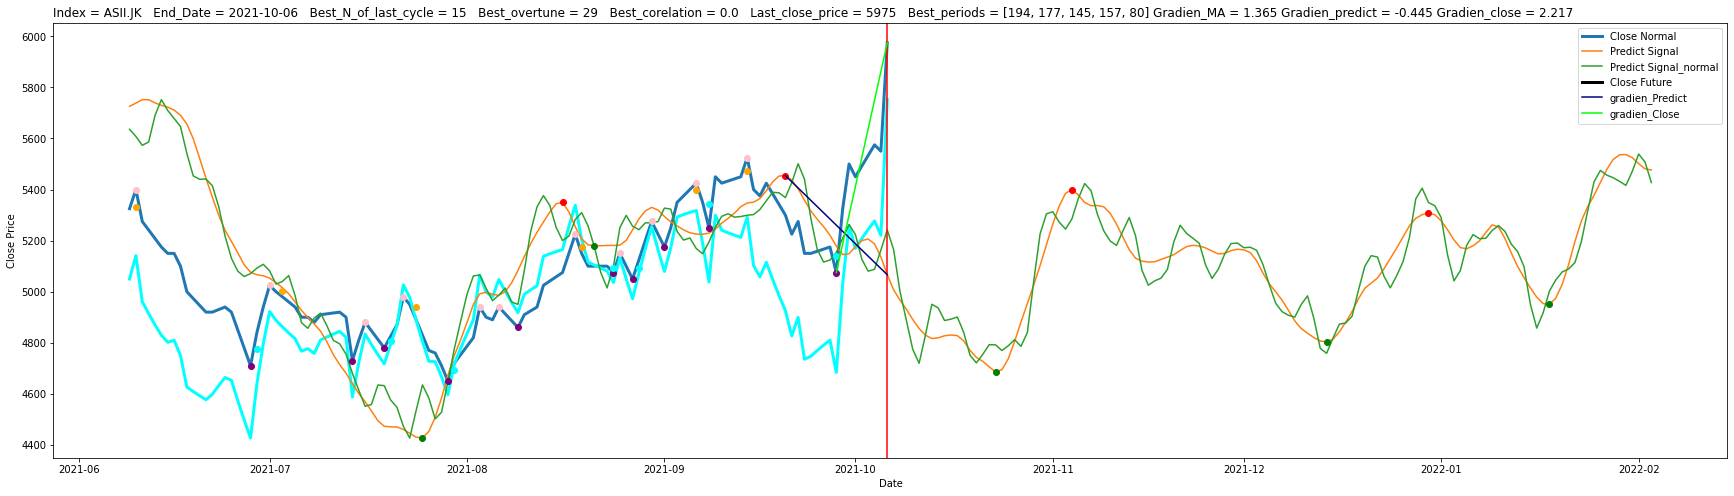

In [ ]:
#folder_name_save_pictures= 'picture'
profit =display.display_with_zoom_automatic(end_date,folder_name_p)
# frames = [buy, sell]
# profit = pd.concat(frames,axis=1)
# profit['profit'] = ((profit['S_Price']-profit['B_Price'])/profit['B_Price'])*100
print(profit)
# profit.to_excel('/content/drive/My Drive/{}/{}_{}_profit.xlsx'.format(folder_name_p,test[0],end_date))